## Import

In [ ]:
if (!requireNamespace("BiocManager")) install.packages("BiocManager")
BiocManager::install(c("BiasedUrn", "Glimma", "GO.db", "edgeR", "gplots", "limma",
    "NMF", "org.Mm.eg.db", "RColorBrewer", "sva"))

Loading required namespace: BiocManager

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'RColorBrewer'”
Installing package(s) 'BiocVersion', 'BiasedUrn', 'Glimma', 'GO.db', 'edgeR',
  'gplots', 'limma', 'NMF', 'org.Mm.eg.db', 'sva'

also installing the dependencies ‘zlibbioc’, ‘formatR’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘plogr’, ‘png’, ‘Biostrings’, ‘XML’, ‘lambda.r’, ‘futile.options’, ‘IRanges’, ‘GenomicRanges’, ‘BiocGenerics’, ‘geneplotter’, ‘RcppArmadillo’, ‘MatrixGenerics’, ‘GenomeInfoDb’, ‘DelayedArray’, ‘RSQLite’, ‘KEGGREST’, ‘bitops’, ‘xtable’, ‘iterators’, ‘plyr’, ‘annotate’, ‘futile.logger’, ‘sno

In [ ]:
install.packages(c("here", "statmod", "xtable"))

In [1]:
# First, let's load all the packages we will need to analyse the data.
library(edgeR)
library(ggplot2)
library(Glimma)
library(gplots)
library(here)
library(limma)
library(NMF)
library(org.Mm.eg.db)
library(RColorBrewer)
library(statmod)
library(sva)
library(tidyverse)

Loading required package: limma


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


here() starts at D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: windows] | Cores 11/12

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The following object is masked from 'package:NMF':

    nrun


The following object is masked from 'package:pkgmaker':

    new2


The following object is masked from 'package:gplots':

    space


The following objects are masked from 'package:base':

    expand.grid, I, unname



Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    wi

## Reading data

In [2]:
filename <- here()
filename

[1] "D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq"

In [3]:
list.files(filename, recursive = TRUE)  # list all the files in this directory

[1] "for Chi/Chi/BP_NF1.txt"                                                  
  [2] "for Chi/Chi/BP_NF2.txt"                                                  
  [3] "for Chi/Chi/BP_NP1.txt"                                                  
  [4] "for Chi/Chi/BP_PEP5.txt"                                                 
  [5] "for Chi/Chi/Cluster_CCI-ind1_ConserMarker.txt"                           
  [6] "for Chi/Chi/Cluster_CCI-ind2_ConserMarker.txt"                           
  [7] "for Chi/Chi/Cluster_CCI-ind3_ConserMarker.txt"                           
  [8] "for Chi/Chi/Cluster_CCI-ind4_ConserMarker.txt"                           
  [9] "for Chi/Chi/CTLCCI_DEG_NF1.xlsx"                                         
 [10] "for Chi/Chi/CTLCCI_DEG_NF2.xlsx"                                         
 [11] "for Chi/Chi/CTLCCI_DEG_NP1.xlsx"                                         
 [12] "for Chi/Chi/CTLCCI_DEG_PEP5.xlsx"                                        
 [13] "for Chi/Chi/in_all.csv"                                                  
 [14] "for Chi/Chi/only_nf1.csv"                                                
 [15] "for Chi/Chi/only_nf2.csv"                                                
 [16] "for Chi/Chi/only_np1.csv"                                                
 [17] "for Chi/Chi/only_pep5.csv"                                               
 [18] "for Chi/Chi/venn.png"                                                    
 [19] "for Chi/go_analysis.ipynb"                                               
 [20] "for Chi/pain_ppi.ipynb"                                                  
 [21] "for Chi/Venn diagram.ipynb"                                              
 [22] "go.txt"                                                                  
 [23] "go_analysis.ipynb"                                                       
 [24] "go_analysis.R"                                                           
 [25] "go_analysis_cancer.ipynb"                                                
 [26] "HHP RNAseq results.docx"                                                 
 [27] "hhp_rna_seq.ipynb"                                                       
 [28] "hhp_rna_seq.R"                                                           
 [29] "hhp_rna_seq_cancer.ipynb"                                                
 [30] "hhp_rna_seq_cancer_re_analysis.ipynb"                                    
 [31] "hhp_rna_seq_cancer_recount.ipynb"                                        
 [32] "hhp_rna_seq_publication.ipynb"                                           
 [33] "input/Cancer_cells/CountTable_clean.txt"                                 
 [34] "input/Cancer_cells/CountTable_clean_new.csv"                             
 [35] "input/Cancer_cells/feature_stats.csv"                                    
 [36] "input/Cancer_cells/file_name.txt"                                        
 [37] "input/Cancer_cells/props.csv"                                            
 [38] "input/Cancer_cells/SampleInfo.csv"                                       
 [39] "input/Cancer_cells/SampleInfo.txt"                                       
 [40] "input/Cancer_cells/SampleInfo_new.csv"                                   
 [41] "input/Cancer_cells/SampleTable.csv"                                      
 [42] "input/Counts/10min_1_counts.txt"                                         
 [43] "input/Counts/10min_2_counts.txt"                                         
 [44] "input/Counts/10min_3_counts.txt"                                         
 [45] "input/Counts/24h_1_counts.txt"                                           
 [46] "input/Counts/24h_2_counts.txt"                                           
 [47] "input/Counts/24h_3_counts.txt"                                           
 [48] "input/Counts/2h_1_counts.txt"                                            
 [49] "input/Counts/2h_2_counts.txt"                                            
 [50] "input/Counts/2h_3_counts.t

In [7]:
sampleinfo <- read.delim(here(filename, "./input/Counts/SampleInfo.txt"), stringsAsFactors = TRUE)  # for google calab
# sampleinfo <- read.delim('./SampleInfo.txt', stringsAsFactors = TRUE) # read
# for google colab
sampleinfo  # with treatment and batch information

FileName,SampleName,Treatment,Batch
<fct>,<fct>,<fct>,<fct>
Control_1_counts,CON_1,control,first
Control_2_counts,CON_2,control,second
Control_3_counts,CON_3,control,third
10min_1_counts,HHP.10MIN_1,hhp.10min,first
10min_2_counts,HHP.10MIN_2,hhp.10min,second
10min_3_counts,HHP.10MIN_3,hhp.10min,third
2h_1_counts,HHP.2H_1,hhp.2hr,first
2h_2_counts,HHP.2H_2,hhp.2hr,second
2h_2_counts,HHP.2H_3,hhp.2hr,third


In [8]:
files <- c("Control_1_counts.txt", "Control_2_counts.txt", "Control_3_counts.txt",
    "10min_1_counts.txt", "10min_2_counts.txt", "10min_3_counts.txt", "2h_1_counts.txt",
    "2h_2_counts.txt", "2h_3_counts.txt", "24h_1_counts.txt", "24h_2_counts.txt",
    "24h_3_counts.txt")
# all the files
read.delim(here(filename, "/input/Counts/", files[1]), nrow = 5)  # test first file
# read.delim(here(filename, './', files[1]), nrow = 5) # test first file counts
# file with geneid and counts

Geneid,RNA.STAR.on.data.191..data.172..and.data.171..mapped.bam
<chr>,<int>
Xkr4,2502
Gm39585,1
Gm38717,31
Rp1,0
Sox17,161


## Create DGE object

In [11]:
x <- readDGE(here(filename, "/input/Counts/", files), columns = c(1, 2))
# x <- readDGE(here(filename, './', files), columns = c(1, 2)) create DGE
# objects with all the counts files, only two columns
head(x)  # x with samples, counts, 
class(x)
dim(x)
names(x)

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,1,42516054,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,1,42617496,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,1,54117547,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,1,43899519,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,1,46263721,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,1,43504944,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,1,34138375,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,1,38916151,1
D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,1,39260379,1


[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 35976    12

[1] "samples" "counts"

In [12]:
sampleinfo$SampleName

[1] CON_1       CON_2       CON_3       HHP.10MIN_1 HHP.10MIN_2 HHP.10MIN_3
 [7] HHP.2H_1    HHP.2H_2    HHP.2H_3    HHP.24H_1   HHP.24H_2   HHP.24H_3  
12 Levels: CON_1 CON_2 CON_3 HHP.10MIN_1 HHP.10MIN_2 HHP.10MIN_3 ... HHP.2H_3

In [13]:
colnames(x) <- sampleinfo$SampleName

In [14]:
x$samples  # x, DGE objects with sample and counts dataframes
head(x$counts)

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,1,42516054,1
CON_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,1,42617496,1
CON_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,1,54117547,1
HHP.10MIN_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,1,43899519,1
HHP.10MIN_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,1,46263721,1
HHP.10MIN_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,1,43504944,1
HHP.2H_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,1,34138375,1
HHP.2H_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,1,38916151,1
HHP.2H_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,1,39260379,1


,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,2502,1912,2264,2488,2131,2184,1837,1818,1850,1682,1262,1342
Gm39585,1,0,2,0,0,0,0,0,0,0,0,0
Gm38717,31,39,15,39,63,20,34,40,17,37,43,10
Rp1,0,0,1,0,0,3,0,1,2,1,0,0
Sox17,161,234,335,159,284,232,107,232,259,189,199,202
LOC108167609,0,1,0,1,1,2,2,1,3,2,0,3


In [15]:
group <- sampleinfo$Treatment
# Take a look
group
# Add the group information into the DGEList
x$samples$group <- group
x$samples

[1] control   control   control   hhp.10min hhp.10min hhp.10min hhp.2hr  
 [8] hhp.2hr   hhp.2hr   hhp.24hr  hhp.24hr  hhp.24hr 
Levels: control hhp.10min hhp.24hr hhp.2hr

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,control,42516054,1
CON_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,control,42617496,1
CON_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,control,54117547,1
HHP.10MIN_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,hhp.10min,43899519,1
HHP.10MIN_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,hhp.10min,46263721,1
HHP.10MIN_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,hhp.10min,43504944,1
HHP.2H_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,hhp.2hr,34138375,1
HHP.2H_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,hhp.2hr,38916151,1
HHP.2H_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,hhp.2hr,39260379,1


## Add annotation

In [16]:
# Annotate the genes.
head(x$counts)
dim(x$counts)
geneid <- rownames(x)
genes <- AnnotationDbi::select(org.Mm.eg.db, keys = geneid, columns = c("ENTREZID",
    "SYMBOL", "GENENAME"), keytype = "SYMBOL")
# retrieve the ENTRZIS, GENENAME based on the SYMBOL keytype
head(genes)
genes <- genes[!duplicated(genes$ENTREZID), ]

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,2502,1912,2264,2488,2131,2184,1837,1818,1850,1682,1262,1342
Gm39585,1,0,2,0,0,0,0,0,0,0,0,0
Gm38717,31,39,15,39,63,20,34,40,17,37,43,10
Rp1,0,0,1,0,0,3,0,1,2,1,0,0
Sox17,161,234,335,159,284,232,107,232,259,189,199,202
LOC108167609,0,1,0,1,1,2,2,1,3,2,0,3


[1] 35976    12

'select()' returned 1:1 mapping between keys and columns



,SYMBOL,ENTREZID,GENENAME
,<chr>,<chr>,<chr>
1,Xkr4,497097,X-linked Kx blood group related 4
2,Gm39585,105243853,"predicted gene, 39585"
3,Gm38717,NA,NA
4,Rp1,19888,retinitis pigmentosa 1 (human)
5,Sox17,20671,SRY (sex determining region Y)-box 17
6,LOC108167609,NA,NA


In [17]:
x <- x[genes$SYMBOL, ]  # keep only the genes with corresponding SYMBOLs in genes
head(x)

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,control,42516054,1
CON_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,control,42617496,1
CON_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,control,54117547,1
HHP.10MIN_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,hhp.10min,43899519,1
HHP.10MIN_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,hhp.10min,46263721,1
HHP.10MIN_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,hhp.10min,43504944,1
HHP.2H_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,hhp.2hr,34138375,1
HHP.2H_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,hhp.2hr,38916151,1
HHP.2H_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,hhp.2hr,39260379,1


In [18]:
x$genes <- genes  # add genes annotation to x
head(x)  # x has samples, counts, genes annotation attributes
table(genes$SYMBOL == rownames(x))  # test the genes and x rownames are the same
# 32879 genes total

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,control,42516054,1
CON_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,control,42617496,1
CON_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,control,54117547,1
HHP.10MIN_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,hhp.10min,43899519,1
HHP.10MIN_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,hhp.10min,46263721,1
HHP.10MIN_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,hhp.10min,43504944,1
HHP.2H_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,hhp.2hr,34138375,1
HHP.2H_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,hhp.2hr,38916151,1
HHP.2H_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,hhp.2hr,39260379,1



 TRUE 
32879 

## Batch effect correction with ComBat-seq

In [19]:
# use ComBat-seq to correct batch effect, keep the counts
treatment = c("control", "control", "control", "hhp.10min", "hhp.10min", "hhp.10min",
    "hhp.2hr", "hhp.2hr", "hhp.2hr", "hhp.24hr", "hhp.24hr", "hhp.24hr")
batch = c("first", "second", "third", "first", "second", "third", "first", "second",
    "third", "first", "second", "third")

In [20]:
groups = sapply(as.character(treatment), switch, control = 1, hhp.10min = 2, hhp.2hr = 3,
    hhp.24hr = 4, USE.NAMES = F)
batches = sapply(as.character(batch), switch, first = 1, second = 2, third = 3, USE.NAMES = F)
# create levels to compare

In [21]:
groups
batches

[1] 1 1 1 2 2 2 3 3 3 4 4 4

[1] 1 2 3 1 2 3 1 2 3 1 2 3

In [22]:
x_corrected_counts <- ComBat_seq(counts = as.matrix(x), batch = batches, group = groups)
# transform counts

Found 3 batches
Using full model in ComBat-seq.
Adjusting for 3 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


In [23]:
head(x$counts)
head(x_corrected_counts)

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,2502,1912,2264,2488,2131,2184,1837,1818,1850,1682,1262,1342
Gm39585,1,0,2,0,0,0,0,0,0,0,0,0
Gm38717,31,39,15,39,63,20,34,40,17,37,43,10
Rp1,0,0,1,0,0,3,0,1,2,1,0,0
Sox17,161,234,335,159,284,232,107,232,259,189,199,202
Gm39586,1,0,0,1,1,0,0,1,0,0,1,1


,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,2167,2071,2449,2157,2297,2308,1593,1983,1969,1457,1357,1432
Gm39585,1,0,2,0,0,0,0,0,0,0,0,0
Gm38717,25,25,30,31,41,39,28,25,33,30,28,22
Rp1,0,0,1,0,0,2,0,1,1,1,0,0
Sox17,211,205,288,209,256,204,142,207,222,245,172,178
Gm39586,1,0,0,1,1,0,0,1,0,0,1,1


In [24]:
x$counts <- x_corrected_counts

## Filter lowly expressed gene, obatain CPMS

In [ ]:
# Filtering lowly expressed genes Obtain CPMs
myCPM <- cpm(x)
# Have a look at the output
head(myCPM)
# Which values in myCPM are greater than 0.33?  A CPM of 0.33 is used as it
# corresponds to a count of 10-15 for the library sizes in this data set.  If
# the count is any smaller, it is considered to be very low, indicating that
# the associated gene is not expressed in that sample.  Let's have a look and
# see whether our threshold of 0.33 does indeed correspond to a count of about
# 10-15 We will look at the first sample
thresh <- myCPM > 0.33
# This produces a logical matrix with TRUEs and FALSEs
head(thresh)
# Summary of how many TRUEs there are in each row There are 11433 genes that
# have TRUEs in all 12 samples.
table(rowSums(thresh))
# we would like to keep genes that have at least 2 TRUES in each row of thresh
keep <- rowSums(thresh) >= 2
table(keep)

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,50.96898221,48.5950653,45.25334454,49.13493471,49.65013515,53.05144169,46.6630295,50.95570731,50.15234315,38.34405173,36.25020990,37.27201441
Gm39585,0.02352053,0.0000000,0.03695659,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Gm38717,0.58801318,0.5866135,0.55434885,0.70615808,0.88622357,0.89644984,0.8201914,0.64240680,0.84054206,0.78951376,0.74797780,0.57261475
Rp1,0.00000000,0.0000000,0.01847830,0.00000000,0.00000000,0.04597179,0.0000000,0.02569627,0.02547097,0.02631713,0.00000000,0.00000000
Sox17,4.96283122,4.8102310,5.32174897,4.76087221,5.53349351,4.68912223,4.1595419,5.31912830,5.65455570,6.44769573,4.59472078,4.63297386
Gm39586,0.02352053,0.0000000,0.00000000,0.02277929,0.02161521,0.00000000,0.0000000,0.02569627,0.00000000,0.00000000,0.02671349,0.02602794


,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Gm39585,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Gm38717,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Rp1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Sox17,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Gm39586,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE



    0     1     2     3     4     5     6     7     8     9    10    11    12 
15339   407   283   221   168   161   172   146   152   163   215   308 15144 

keep
FALSE  TRUE 
15746 17133 

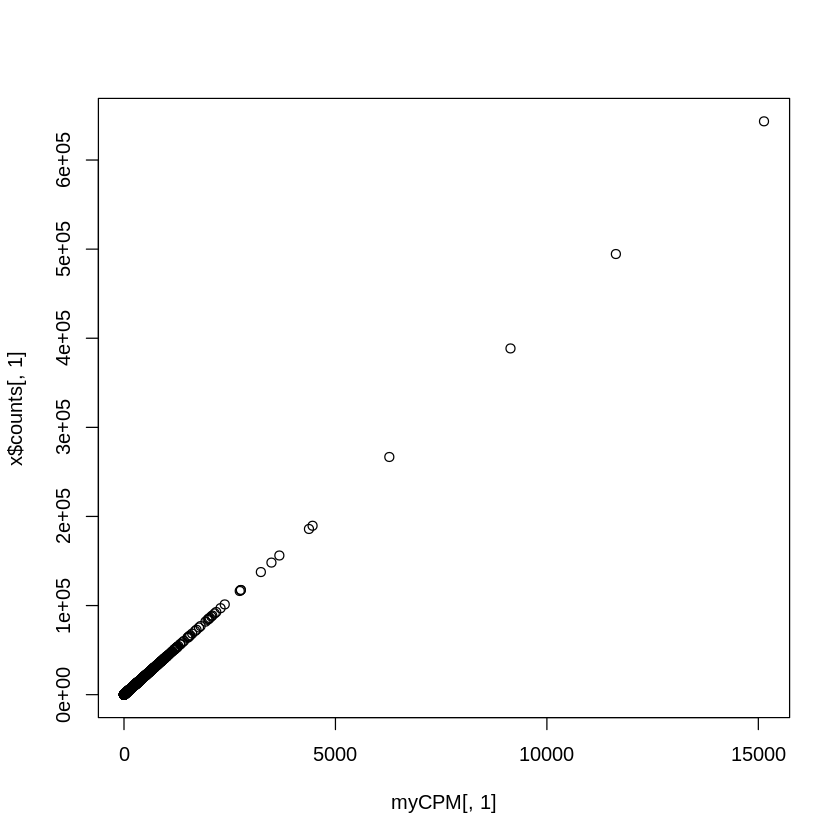

In [ ]:
plot(myCPM[, 1], x$counts[, 1])
# Let us limit the x and y-axis so we can actually look to see what is
# happening at the smaller counts

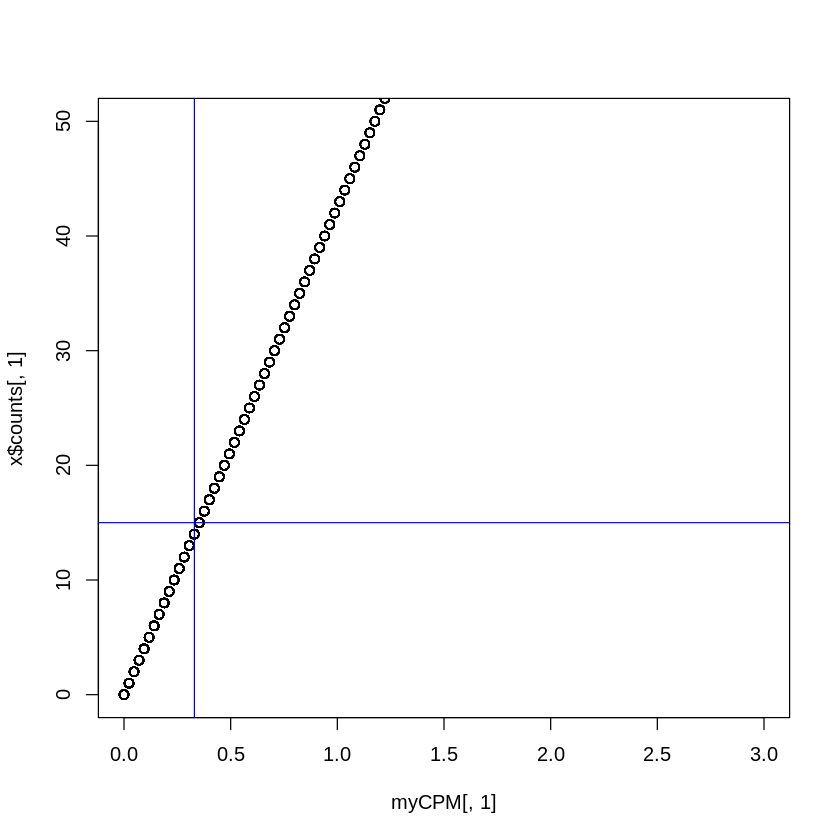

In [ ]:
plot(myCPM[, 1], x$counts[, 1], ylim = c(0, 50), xlim = c(0, 3))
# Add a vertical line at 0.5 CPM
abline(v = 0.33, h = 15, col = "blue")
# Now that we've checked our filtering method we will filter the DGEList
# object.)  Let us limit the x and y-axis so we can actually look to see what
# is happening at the smaller counts

In [ ]:
# Now that we've checked our filtering method we will filter the DGEList
# object.
x <- x[keep, keep.lib.sizes = FALSE]

In [ ]:
dim(x)
head(x)

[1] 17133    12

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,/content/.//Control_1_counts.txt,control,40940220,1
CON_2,/content/.//Control_2_counts.txt,control,40950848,1
CON_3,/content/.//Control_3_counts.txt,control,52475990,1
HHP.10MIN_1,/content/.//10min_1_counts.txt,hhp.10min,42299905,1
HHP.10MIN_2,/content/.//10min_2_counts.txt,hhp.10min,44519296,1
HHP.10MIN_3,/content/.//10min_3_counts.txt,hhp.10min,42011818,1
HHP.2H_1,/content/.//2h_1_counts.txt,hhp.2hr,32942361,1
HHP.2H_2,/content/.//2h_2_counts.txt,hhp.2hr,37487896,1
HHP.2H_3,/content/.//2h_3_counts.txt,hhp.2hr,38061322,1


## Quality control

[1] 40940220 40950848 52475990 42299905 44519296 42011818 32942361 37487896
 [9] 38061322 36818449 36170247 36964152

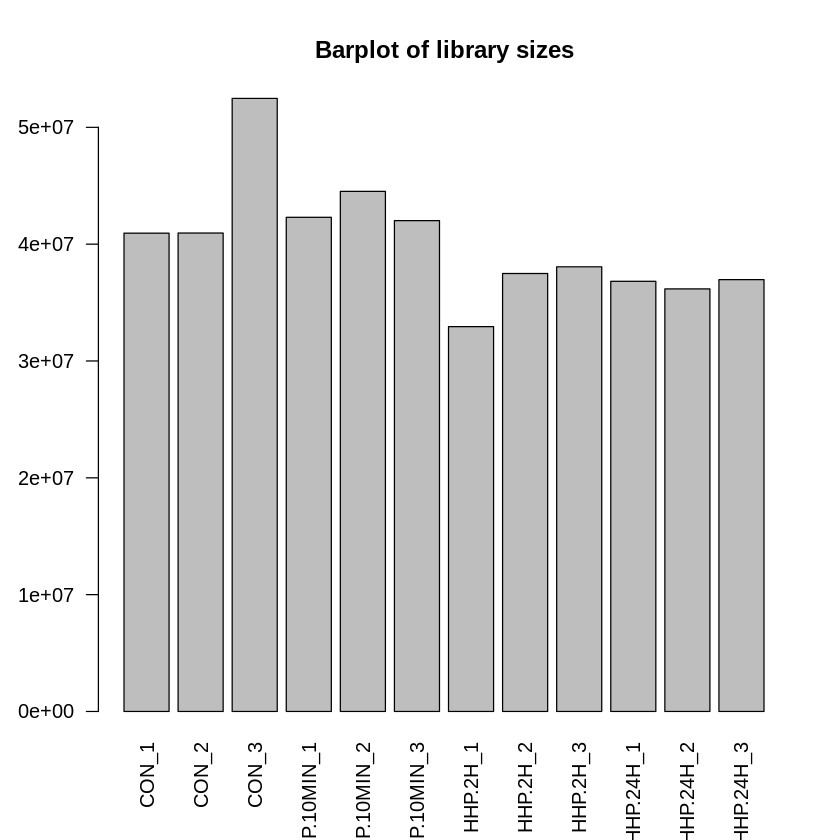

In [ ]:
# Quality control Library size and distribution plots First, we can check how
# many reads we have for each sample in the y.
x$samples$lib.size
# The names argument tells the barplot to use the sample names on the x-axis
# The las argument rotates the axis names
barplot(x$samples$lib.size, names = colnames(x), las = 2)
# Add a title to the plot
title("Barplot of library sizes")

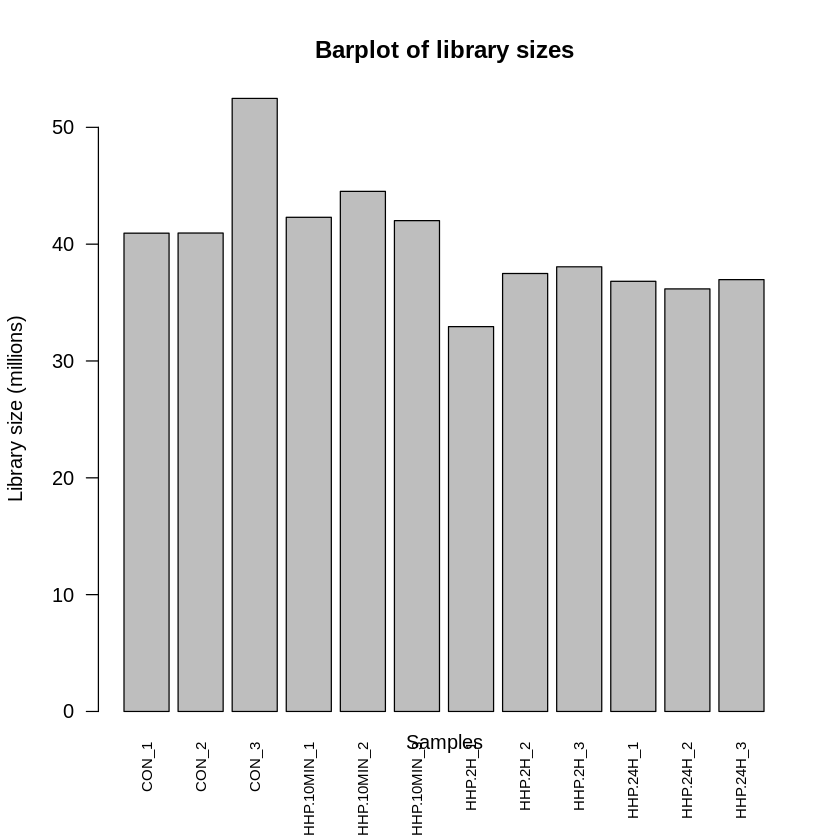

In [ ]:
# we can also adjust the labelling if we want
barplot(x$samples$lib.size/1e+06, names = colnames(x), las = 2, ann = FALSE, cex.names = 0.75)
mtext(side = 1, text = "Samples", line = 0.5)
mtext(side = 2, text = "Library size (millions)", line = 3)
title("Barplot of library sizes")

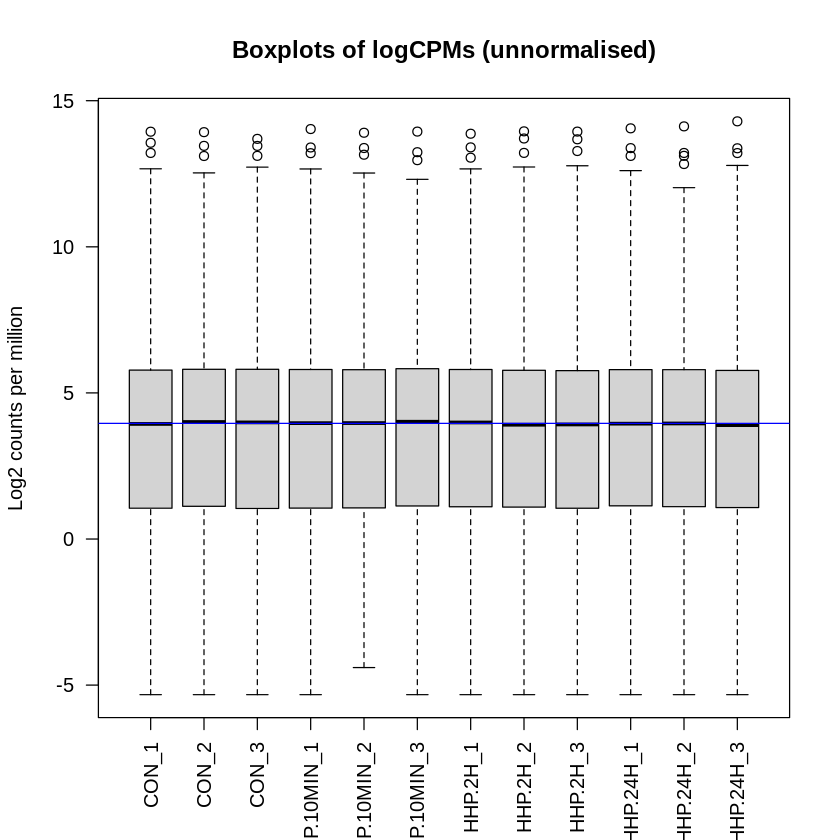

In [ ]:
# Count data is not normally distributed, so if we want to examine the
# distributions of the raw counts we need to log the counts.  Get log2 counts
# per million
logcounts <- cpm(x, log = TRUE, prior.count = 1)
# Check distributions of samples using boxplots
boxplot(logcounts, xlab = "", ylab = "Log2 counts per million", las = 2)
# Let's add a blue horizontal line that corresponds to the median logCPM
abline(h = median(logcounts), col = "blue")
title("Boxplots of logCPMs (unnormalised)")

In [ ]:
saveRDS(logcounts, "./output/for_publication/logcounts.rds")

In [ ]:
list_markers <- c("Calca", "Mrgprd", "Nefh", "Scn10a", "Stmn2", "Tac1", "Tubb3", "Apoe", "Ednrb", "Gfap", "Fabp7", "Mpzl1", "Cldn5", "Flt1", "Esam")
counts <- 2**(logcounts[list_markers, ]) -1
counts

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Calca,466.853350,519.526931,525.017824,441.673641,541.194288,536.111857,547.862295,493.104366,481.719633,671.024943,558.075534,566.033701
Mrgprd,13.191912,11.600966,11.887940,13.209343,14.501349,14.710976,14.202940,13.562940,14.972862,19.802541,21.225481,18.557352
Nefh,718.366397,624.262241,624.167925,674.747439,639.174269,508.762411,625.695206,687.140319,779.397139,659.237375,741.955939,792.334025
Scn10a,841.081901,864.159581,817.989890,821.721757,929.497803,891.678456,931.380627,863.490565,838.039345,834.095356,776.265905,874.467651
Stmn2,1055.394369,1071.603383,1014.727474,1077.372436,1023.793989,1026.116812,1028.975328,1035.386040,1077.810301,1100.076129,1134.184372,1139.859903
Tac1,65.829633,59.219025,68.752038,56.424568,71.712494,66.220290,72.152639,68.487332,60.215640,137.053536,127.390081,133.668873
Tubb3,1223.273282,1315.847397,1233.932475,1333.732338,1343.587888,1414.293281,1310.618757,1215.657551,1278.696640,1454.898228,1448.614059,1385.313918
Apoe,248.461764,236.748918,276.332675,263.517221,236.292806,203.015125,234.527149,243.823917,268.983995,217.176407,245.940551,216.208298
Ednrb,67.319610,68.303086,60.271970,67.795751,60.706031,64.458881,64.715406,69.554343,71.145370,80.424320,82.629537,85.351793
Gfap,3.152885,2.907618,2.740900,3.091118,3.360113,2.690550,2.394436,2.946180,3.885492,1.768105,1.347265,1.080961


In [ ]:
write_csv(as.data.frame(counts), "1.csv")

## Multidimensional scaling plots 

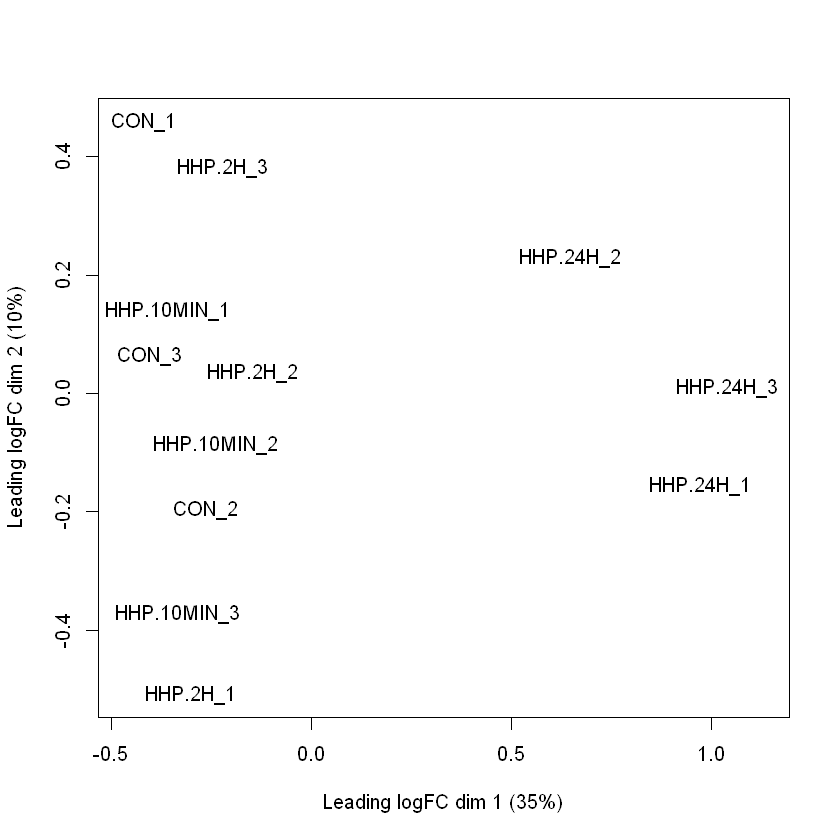

In [ ]:
# An MDSplot is a visualisation of a principle components analysis, which
# determines the greatest sources of variation in the data.
plotMDS(x)

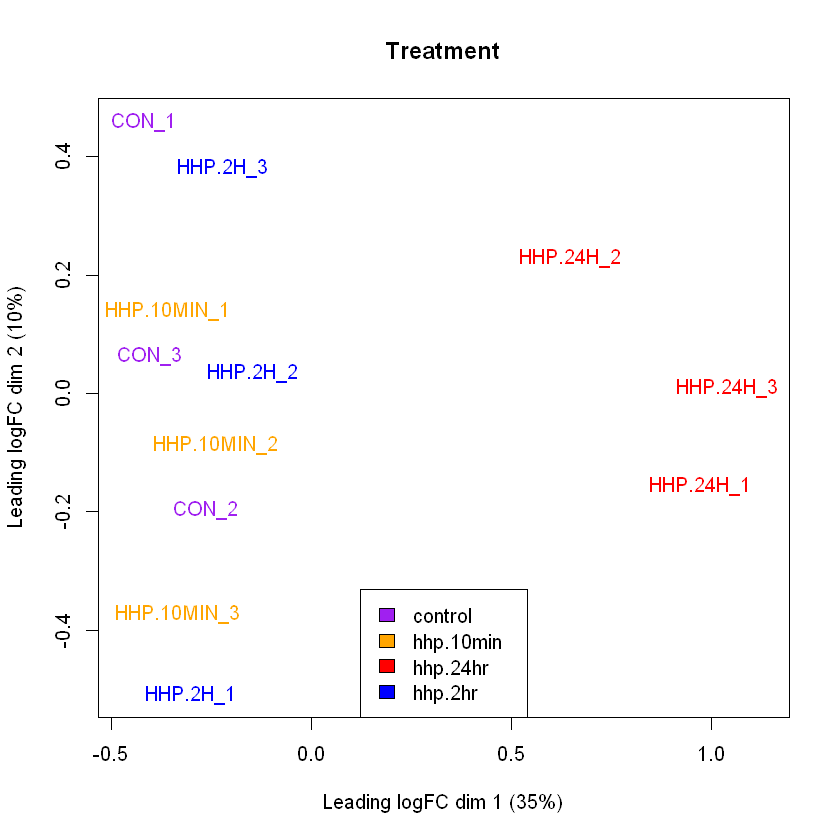

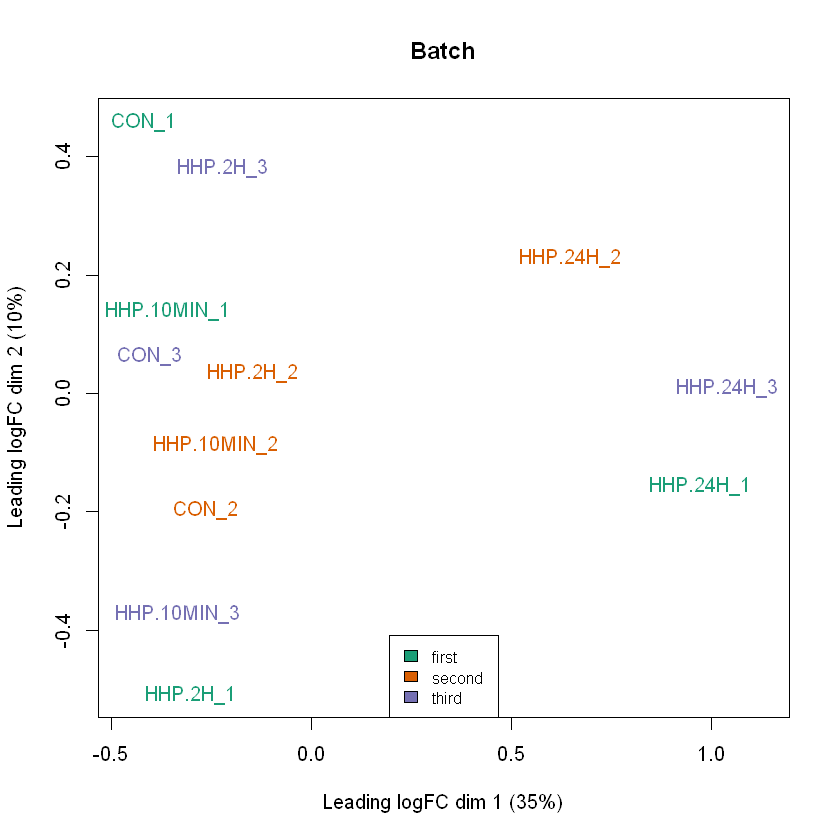

In [ ]:
# Redo the MDSplot with corrected information
col.cell <- c("purple", "orange", "red", "blue")[sampleinfo$Treatment]
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
char.celltype <- c(1, 4)[sampleinfo$Treatment]
plotMDS(x, col = col.cell)
legend("bottom", fill = c("purple", "orange", "red", "blue"), legend = levels(sampleinfo$Treatment))
title("Treatment")

p1 <- plotMDS(x, col = col.status)
legend("bottom", fill = c("#1B9E77", "#D95F02", "#7570B3"), legend = levels(sampleinfo$Batch),
    cex = 0.8)
title("Batch")

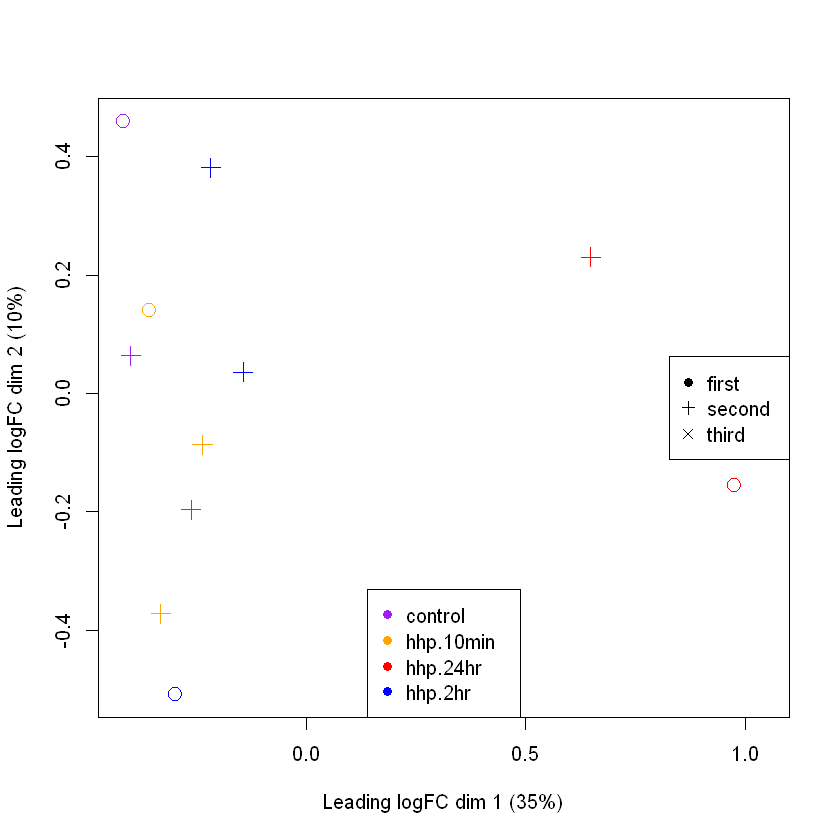

In [ ]:
char.status <- c(1, 3, 3)[sampleinfo$Batch]
plotMDS(x, dim = c(1, 2), col = col.cell, pch = char.status, cex = 1.5)
legend("bottom", legend = levels(sampleinfo$Treatment), col = c("purple", "orange",
    "red", "blue"), pch = 16)
legend("right", legend = levels(sampleinfo$Batch), pch = c(16, 3, 4))

## Hierarchical clustering with heatmaps

In [ ]:
# Let's select data for the 500 most variable genes and plot the heatmap We
# estimate the variance for each row in the logcounts matrix
var_genes <- apply(logcounts, 1, var)
head(var_genes)
# Get the gene names for the top 500 most variable genes
select_var <- names(sort(var_genes, decreasing = TRUE))[1:50]
head(select_var)
# Subset logcounts matrix
highly_variable_lcpm <- logcounts[select_var, ]
dim(highly_variable_lcpm)
head(highly_variable_lcpm)

Xkr4     Gm38717       Sox17      Mrpl15      Lypla1       Tcea1 
0.037536800 0.062432857 0.027797314 0.007232336 0.006051321 0.006673402

[1] "Myod1"         "D730045A05Rik" "Gm36317"       "A230052G05Rik"
[5] "Gm27204"       "Gm39590"

[1] 50 12

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Myod1,-5.326856,-2.352169,-0.1194126,-5.326856,-1.466547,0.515290,-5.326856,-2.659348,-0.6684032,-5.3268565,-2.1946649,-0.9661422
D730045A05Rik,-5.326856,-2.182649,-4.5073013,-5.326856,-2.138764,-3.375973,-2.772614,-5.326856,-3.2690266,-0.3992684,-1.6036998,-0.5687677
Gm36317,-5.326856,-3.761139,-5.3268565,-3.791934,-4.399672,-5.326856,-5.326856,-2.240304,-5.3268565,-1.2098313,-2.0227362,-1.1273161
A230052G05Rik,-3.348246,-4.341266,-2.4952034,-1.397731,-1.763853,-1.580563,-2.271942,-2.659348,-1.3483455,0.6284389,0.8210389,0.1110193
Gm27204,-3.027755,-4.341266,-3.0565343,-2.584163,-2.289037,-3.057379,-3.108016,-4.276764,-4.2880468,-0.4518940,-0.2746015,-0.1239502
Gm39590,-3.760891,-3.028054,-3.3055733,-5.326856,-2.646674,-3.375973,-4.177339,-2.240304,-2.9433243,-0.2520136,-1.2793777,-0.5687677


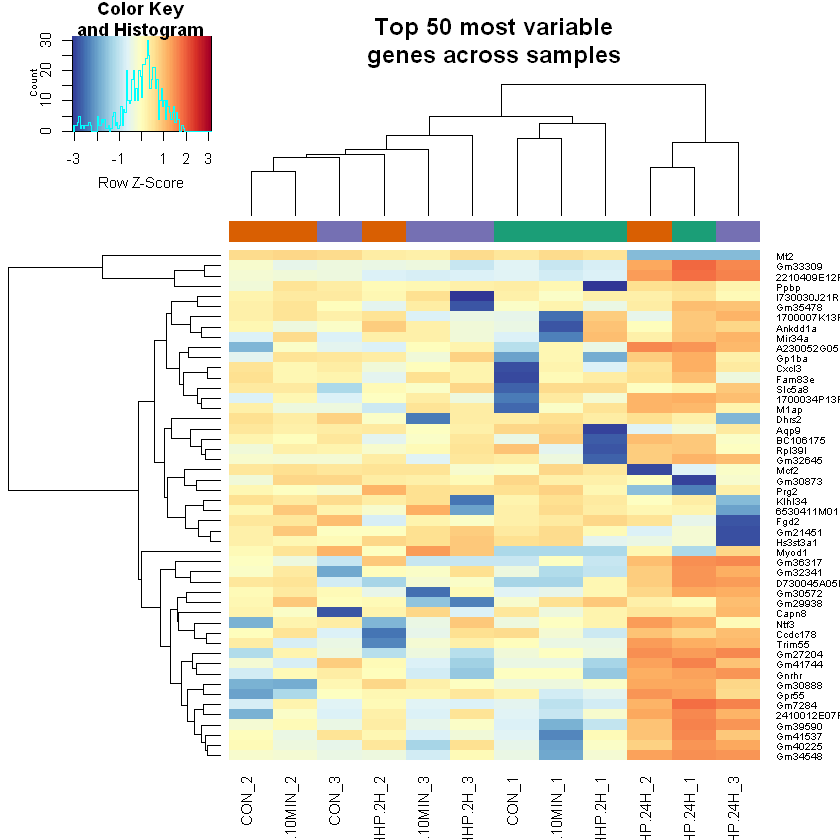

In [ ]:
## Get some nicer colours
mypalette <- brewer.pal(11, "RdYlBu")
morecols <- colorRampPalette(mypalette)
# Set up colour vector for celltype variable
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
# Plot the heatmap
heatmap.2(highly_variable_lcpm, scale = "row", col = rev(morecols(100)), trace = "none",
    main = "Top 50 most variable
genes across samples", ColSideColors = col.status)

## Normalisation for composition bias

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,control,40940220,0.9901745
CON_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,control,40950848,1.0116063
CON_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,control,52475990,1.0005820
HHP.10MIN_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,hhp.10min,42299905,0.9968630
HHP.10MIN_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,hhp.10min,44519296,0.9986718
HHP.10MIN_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,hhp.10min,42011818,1.0279085
HHP.2H_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,hhp.2hr,32942361,1.0048456
HHP.2H_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,hhp.2hr,37487896,0.9847548
HHP.2H_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,hhp.2hr,38061322,0.9760098


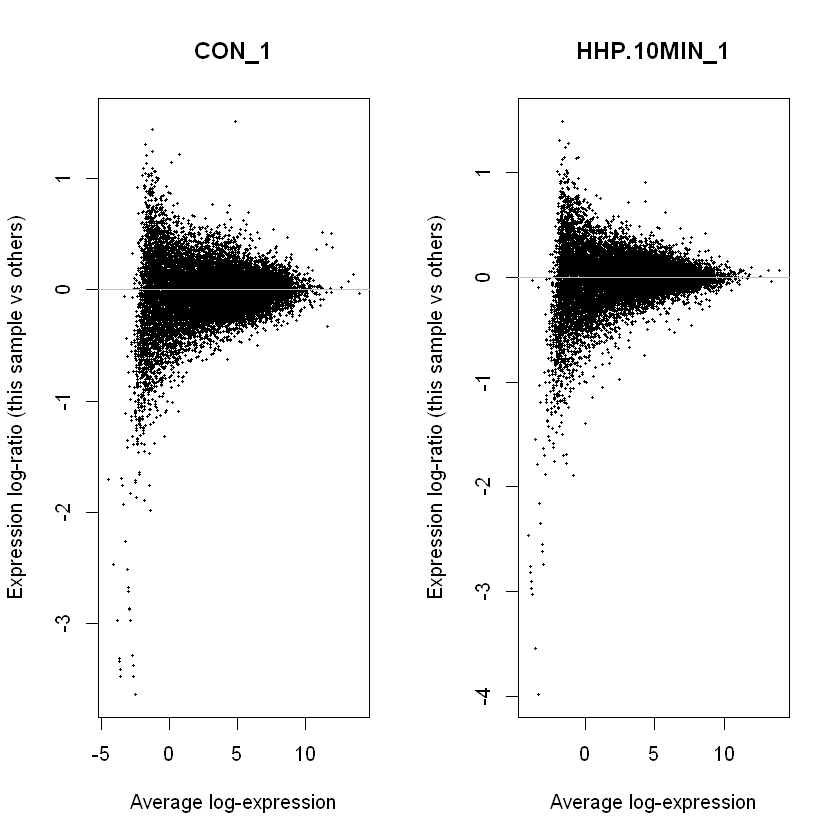

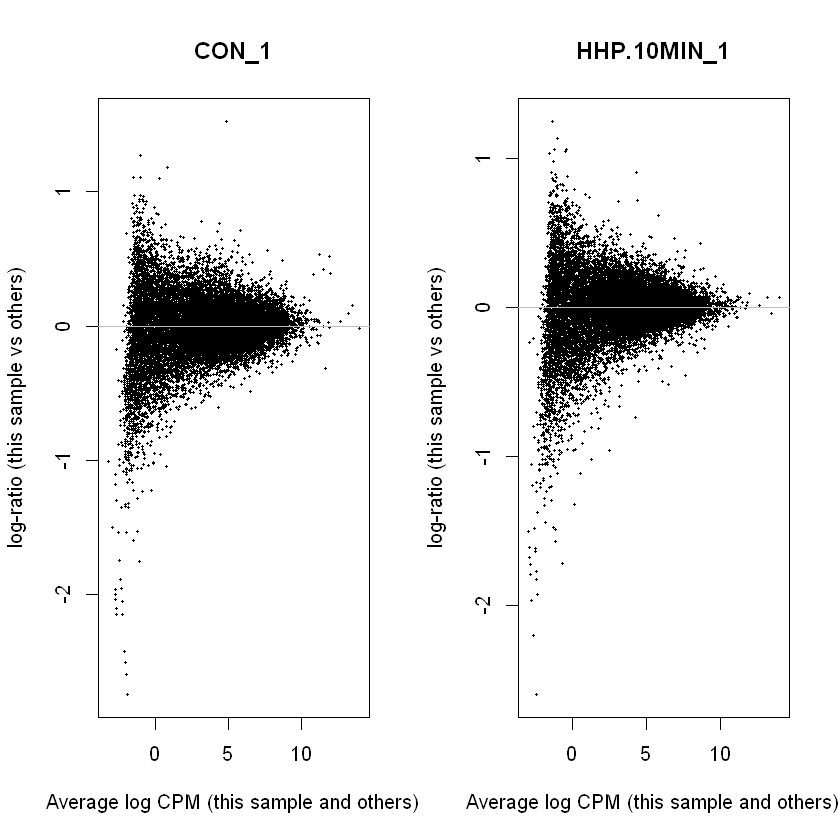

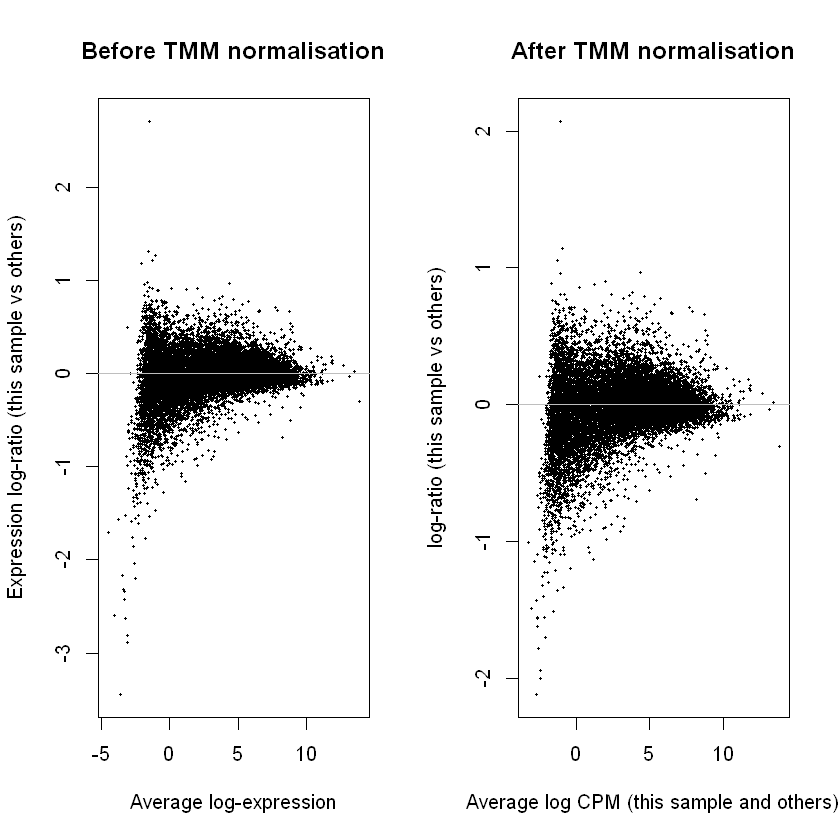

In [ ]:
# The calcNormFactors function calculates the normalization factors between
# libraries.  TMM normalisation (and most scaling normalisation methods) scale
# relative to one sample.  Apply normalisation to DGEList object
x <- calcNormFactors(x)
x$samples
# The last two samples have much smaller normalisation factors, and MCL1.LA and
# MCL1.LB have the largest.  If we plot mean difference plots using the plotMD
# function for these samples, we should be able to see the composition bias
# problem.
par(mfrow = c(1, 2))
plotMD(logcounts, column = 1)
abline(h = 0, col = "grey")
plotMD(logcounts, column = 4)
abline(h = 0, col = "grey")
# if we redo these plots using y, we should see the composition bias problem
# has been solved.
par(mfrow = c(1, 2))
plotMD(x, column = 1)
abline(h = 0, col = "grey")
plotMD(x, column = 4)
abline(h = 0, col = "grey")
# Plot the biased and unbiased MD plots side by side for the same sample to see
# the before and after TMM normalisation effect.
par(mfrow = c(1, 2))
plotMD(logcounts, column = 3, main = "Before TMM normalisation")
abline(h = 0, col = "grey")
plotMD(x, column = 3, main = "After TMM normalisation")
abline(h = 0, col = "grey")

In [ ]:
x

,files,group,lib.size,norm.factors
,<chr>,<fct>,<dbl>,<dbl>
CON_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt,control,40940220,0.9901745
CON_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt,control,40950848,1.0116063
CON_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt,control,52475990,1.0005820
HHP.10MIN_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt,hhp.10min,42299905,0.9968630
HHP.10MIN_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt,hhp.10min,44519296,0.9986718
HHP.10MIN_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_3_counts.txt,hhp.10min,42011818,1.0279085
HHP.2H_1,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_1_counts.txt,hhp.2hr,32942361,1.0048456
HHP.2H_2,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_2_counts.txt,hhp.2hr,37487896,0.9847548
HHP.2H_3,D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//2h_3_counts.txt,hhp.2hr,38061322,0.9760098


In [ ]:
saveRDS(x, "./output/x_with_correction.rds")

## Differential expression with limma-voom

In [ ]:
x <- readRDS("./output/x_with_correction.rds")
summary(x)

        Length Class      Mode   
samples      4 data.frame list   
counts  205596 -none-     numeric
genes        3 data.frame list   

In [ ]:
# Create the design matrix Look at group variable again
treatment <- sampleinfo$Treatment
# Take a look
treatment
# Convert to factor
treatment <- factor(treatment)
# Specify a design matrix without an intercept term
design <- model.matrix(~0 + treatment)
design
# Make the column names of the design matrix a bit nicer
colnames(design) <- levels(treatment)
design

[1] control   control   control   hhp.10min hhp.10min hhp.10min hhp.2hr  
 [8] hhp.2hr   hhp.2hr   hhp.24hr  hhp.24hr  hhp.24hr 
Levels: control hhp.10min hhp.24hr hhp.2hr

,treatmentcontrol,treatmenthhp.10min,treatmenthhp.24hr,treatmenthhp.2hr
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
10,0,0,1,0


,control,hhp.10min,hhp.24hr,hhp.2hr
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
10,0,0,1,0


An object of class "EList"
$genes
    SYMBOL ENTREZID                                  GENENAME
1     Xkr4   497097         X-linked Kx blood group related 4
3  Gm38717     <NA>                                      <NA>
5    Sox17    20671     SRY (sex determining region Y)-box 17
10  Mrpl15    27395       mitochondrial ribosomal protein L15
11  Lypla1    18777                       lysophospholipase 1
13   Tcea1    21399 transcription elongation factor A (SII) 1

$targets
                                                                                                       files
CON_1       D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_1_counts.txt
CON_2       D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_2_counts.txt
CON_3       D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//Control_3_counts.txt
HHP.10MIN_1   D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_1_counts.txt
HHP.10MIN_2   D:/GoogleDrive/Python Scripts/Experiment Project/HHP RNA-seq//input/Counts//10min_2_counts.txt
                group lib.size norm.factors
CON_1         control 40537964    0.9901745
CON_2         control 41426138    1.0116063
CON_3         control 52506531    1.0005820
HHP.10MIN_1 hhp.10min 42167209    0.9968630
HHP.10MIN_2 hhp.10min 44460167    0.9986718
7 more rows ...

$E
         Samples
Tags           CON_1      CON_2      CON_3 HHP.10MIN_1 HHP.10MIN_2 HHP.10MIN_3
  Xkr4     5.7406145  5.6439907  5.5438466   5.6770952  5.69140765   5.7403049
  Gm38717 -0.6687764 -0.7000441 -0.7836877  -0.4207697 -0.09940206  -0.1286544
  Sox17    2.3833121  2.3105251  2.4580025   2.3127568  2.52837352   2.2435219
  Mrpl15   4.5932263  4.7063485  4.6773556   4.6026546  4.47902747   4.6085395
  Lypla1   5.3769030  5.3836699  5.3793226   5.3311462  5.38392811   5.3558754
  Tcea1    6.4663544  6.3963352  6.4730817   6.4006246  6.44907170   6.3702832
         Samples
Tags       HHP.2H_1   HHP.2H_2   HHP.2H_3  HHP.24H_1  HHP.24H_2  HHP.24H_3
  Xkr4     5.589137  5.7476432  5.7283923  5.2907312  5.2285509  5.2801921
  Gm38717 -0.215956 -0.5337641 -0.1491322 -0.2878116 -0.3452956 -0.7122742
  Sox17    2.105972  2.4907780  2.5824401  2.7210302  2.2522669  2.2756530
  Mrpl15   4.557559  4.5020322  4.5734969  4.5734279  4.6475682  4.4531912
  Lypla1   5.365311  5.2185017  5.2831292  5.1860604  5.2858495  5.2393343
  Tcea1    6.452245  6.3869682  6.4697463  6.2308576  6.3278740  6.2302403

$weights
           [,1]       [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
[1,] 211.180209 213.032387 233.09746 218.21399 222.74265 220.33727 195.74493
[2,]   9.556568   9.706597  11.54987  12.72214  13.24832  12.95569  10.17706
[3,]  50.783162  51.609601  61.49218  51.69471  53.79000  52.62498  43.78531
[4,] 148.938571 150.885598 172.30910 146.57071 151.28819 148.67104 125.30387
[5,] 194.693123 196.746193 217.80965 196.91801 201.67943 199.11678 170.00883
[6,] 256.000731 257.575335 273.52214 256.91834 260.73600 258.65839 240.26571
          [,8]      [,9]     [,10]     [,11]     [,12]
[1,] 205.61042 206.18039 179.45362 176.88589 178.53086
[2,]  11.02459  11.07584  10.28494  10.07742  10.21022
[3,]  47.55289  47.77908  48.45262  47.43445  48.08572
[4,] 134.14129 134.65804 135.63900 133.32796 134.80757
[5,] 180.10532 180.68889 177.57813 175.04385 176.66741
[6,] 248.66754 249.15426 240.05875 237.77005 239.23786

$design
  control hhp.10min hhp.24hr hhp.2hr
1       1         0        0       0
2       1         0        0       0
3       1         0        0       0
4       0         1        0       0
5       0         1        0       0
7 more rows ...

[1] "genes"   "targets" "E"       "weights" "design"

[1] 17133    12

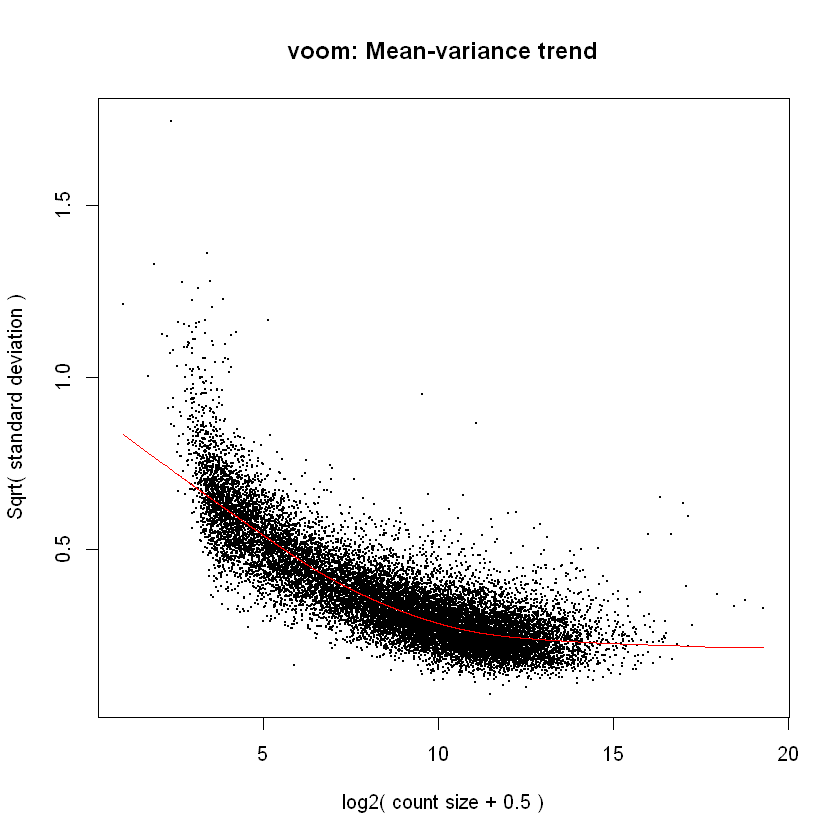

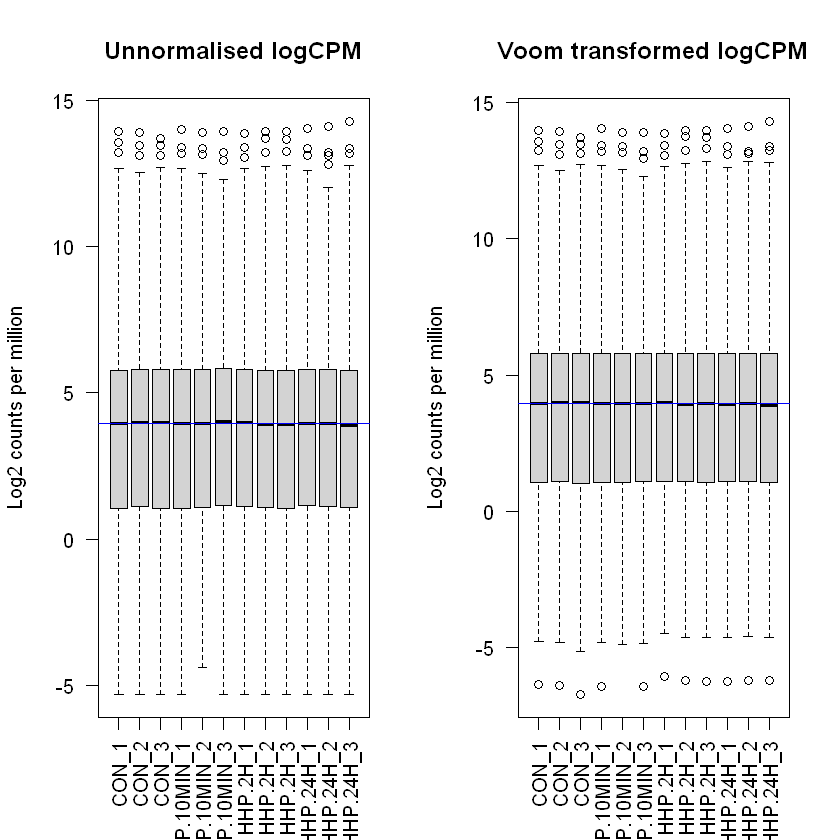

In [ ]:
# Voom transform the data
v <- voom(x, design, plot = TRUE)
head(v)
# What is contained in this object?
names(v)
dim(v$weights)
# We can repeat the box plots for the normalised data to compare to before
# normalisation.  The expression values in v$E are already log2 values so we
# don't need to log-transform.
par(mfrow = c(1, 2))
boxplot(logcounts, xlab = "", ylab = "Log2 counts per million", las = 2, main = "Unnormalised logCPM")
## Let's add a blue horizontal line that corresponds to the median logCPM
abline(h = median(logcounts), col = "blue")
boxplot(v$E, xlab = "", ylab = "Log2 counts per million", las = 2, main = "Voom transformed logCPM")
## Let's add a blue horizontal line that corresponds to the median logCPM
abline(h = median(v$E), col = "blue")

In [ ]:
x["Tubb3", ]$counts / x$samples$lib.size

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Tubb3,0.001224248,0.001316823,0.001234908,0.001334707,0.001344563,0.001415268,0.001311594,0.001216633,0.001279672,0.001455873,0.001449589,0.001386289


## Testing for differential expression, contro vs HHP.24h

In [ ]:
# Now that we have the voom transformed data we can use limma to test for
# differential expression.  Fit the linear model
fit <- lmFit(v)
names(fit)
# The comparison of interest can be specified using the makeContrasts function.
cont.matrix <- makeContrasts(convs24h = hhp.24hr - control, levels = design)
cont.matrix
# Now we can apply the contrasts matrix to the fit object to get the statistics
# and estimated parameters of our comparison that we are interested in.  Now we
# can apply the contrasts matrix to the fit object to get the statistics and
# estimated parameters of our comparison that we are interested in.
fit.cont.B <- contrasts.fit(fit, cont.matrix)
# The final step is to call the eBayes function, which performs empirical Bayes
# shrinkage on the variances, and estimates moderated t-statistics and the
# associated p-values.
fit.cont.B <- eBayes(fit.cont.B)
# Check the dimensions of the fit object
dim(fit.cont.B)
# We can use the limma decideTests function to generate a quick summary of DE
# genes for the contrasts.
summa.fit.B <- decideTests(fit.cont.B, lfc = 0.5)
summary(summa.fit.B)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "genes"           
 [9] "Amean"            "method"           "design"

,convs24h
control,-1
hhp.10min,0
hhp.24hr,1
hhp.2hr,0


[1] 17133     1

       convs24h
Down       1023
NotSig    15174
Up          936

In [ ]:
head(fit.cont.B)

,convs24h
Xkr4,-0.37287060
Gm38717,0.27318322
Sox17,0.02941984
Mrpl15,-0.10231584
Lypla1,-0.14310922
Tcea1,-0.18295759
,convs24h
Xkr4,0.05823198
Gm38717,0.25527014
Sox17,0.11422609


In [ ]:
seq_tab <- topTable(fit.cont.B,adjust="BH",n=Inf)
head(seq_tab)

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Slc39a10,Slc39a10,227059,"solute carrier family 39 (zinc transporter), member 10",1.3836741,6.676120,20.83221,5.168045e-12,3.224552e-08,17.96839
Pdrg1,Pdrg1,68559,p53 and DNA damage regulated 1,0.9768967,5.423784,20.69827,5.646213e-12,3.224552e-08,17.79765
Calr3,Calr3,73316,calreticulin 3,1.7933809,2.194344,23.16858,1.196791e-12,2.050461e-08,17.21405
Sprn,Sprn,212518,shadow of prion protein,-1.2815469,4.728444,-17.23106,6.872963e-11,2.778021e-07,15.24172
Adgrl1,Adgrl1,330814,adhesion G protein-coupled receptor L1,-0.6871241,7.409211,-16.55570,1.179766e-10,2.778021e-07,14.90060
Rnasel,Rnasel,24014,"ribonuclease L (2', 5'-oligoisoadenylate synthetase-dependent)",0.7151246,4.521350,16.58022,1.156451e-10,2.778021e-07,14.84100


In [ ]:
saveRDS(summa.fit.B, "./output/for_publication/summa.fit.B.rds")

In [ ]:
write.csv(seq_tab, "RNA-seqResults-Convs24h.csv")

In [ ]:
saveRDS(seq_tab, "./output/for_publication/seq_tab.rds")

## Plots after testing for DE

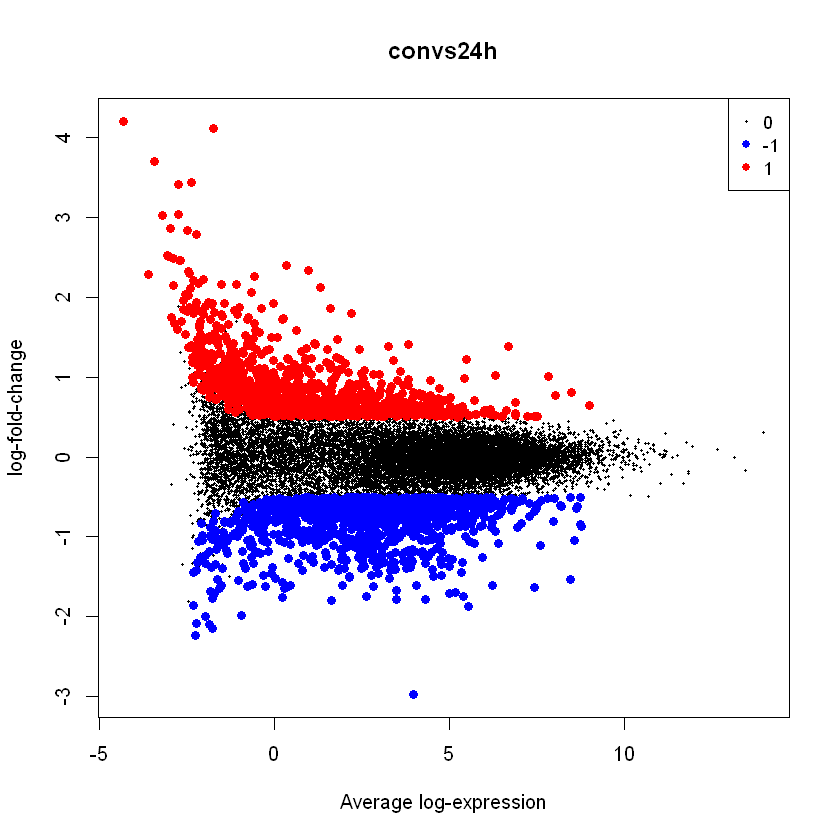

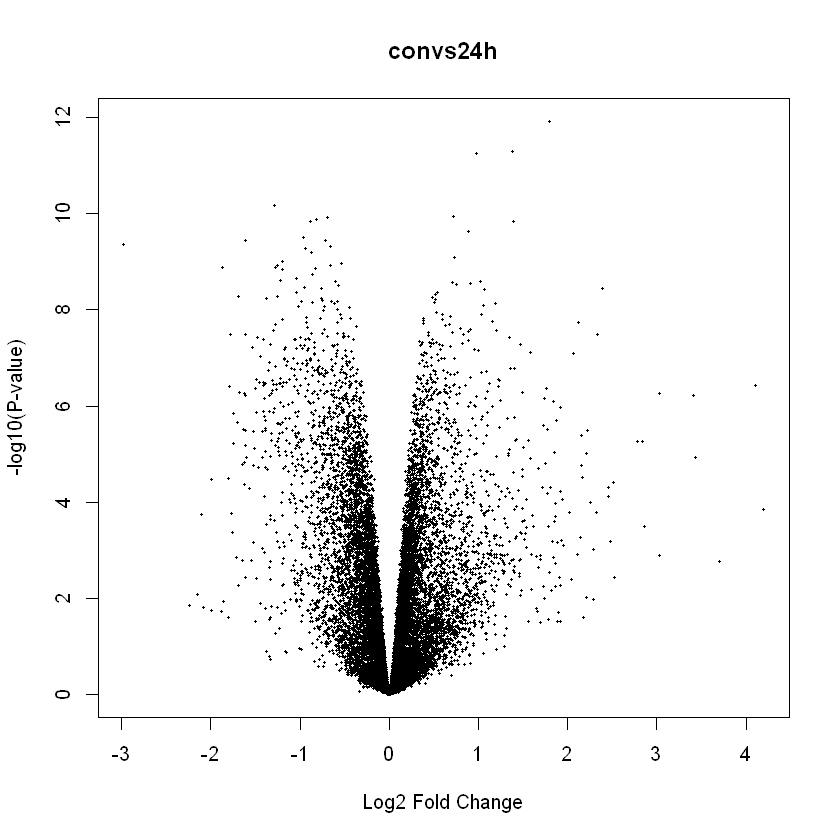

In [ ]:
# We want to highlight the significant genes. We can get this from decideTests.
plotMD(fit.cont.B, coef = 1, status = summa.fit.B[, "convs24h"], values = c(-1, 1),
    hl.col = c("blue", "red"))
# For the volcano plot we have to specify how many of the top genes to
# highlight.  We can also specify that we want to plot the gene symbol for the
# highlighted genes.  let's highlight the top 100 most DE genes
volcanoplot(fit.cont.B, coef = 1,  names = fit.cont.B$genes$SYMBOL,
    main = "convs24h")
# ook at the MD plot and volcano plot for the second comparison, L.PregVsLac.
# Change the number of highlighted genes to 200 in the volcano plot.

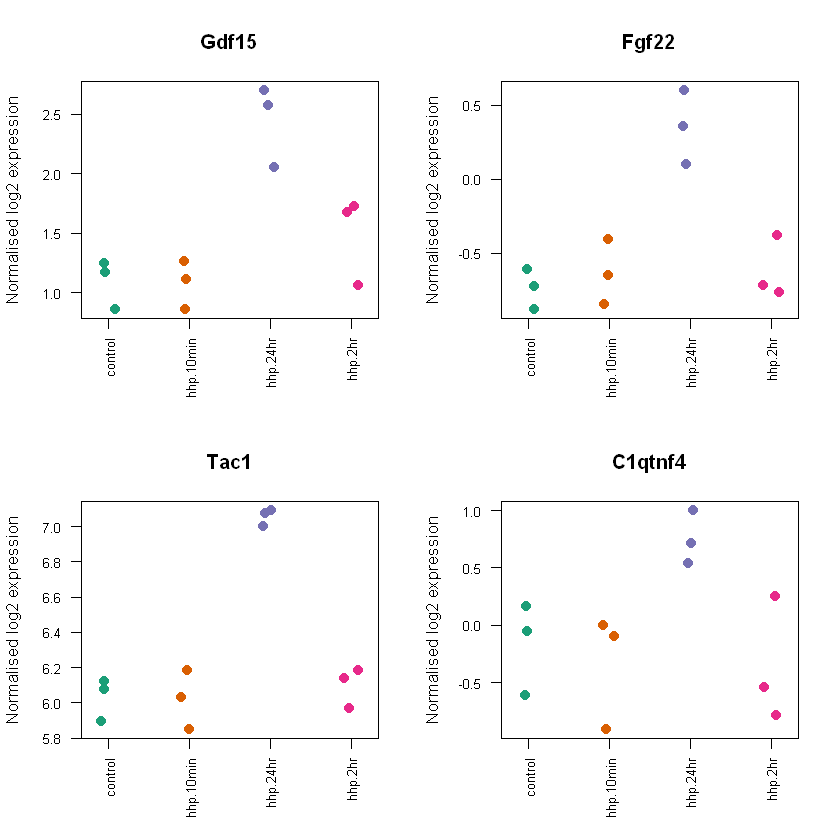

In [ ]:
# It is recommended to have a look at the expression levels of the individual
# samples for the genes of interest.
par(mfrow = c(2, 2))
nice.col <- brewer.pal(6, name = "Dark2")
stripchart(v$E["Gdf15", ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8,
    pch = 16, cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
    main = "Gdf15")
stripchart(v$E["Fgf22", ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8,
    pch = 16, cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
    main = "Fgf22")
stripchart(v$E["Tac1", ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8, pch = 16,
    cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
    main = "Tac1")
stripchart(v$E["C1qtnf4", ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8,
    pch = 16, cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
    main = "C1qtnf4")

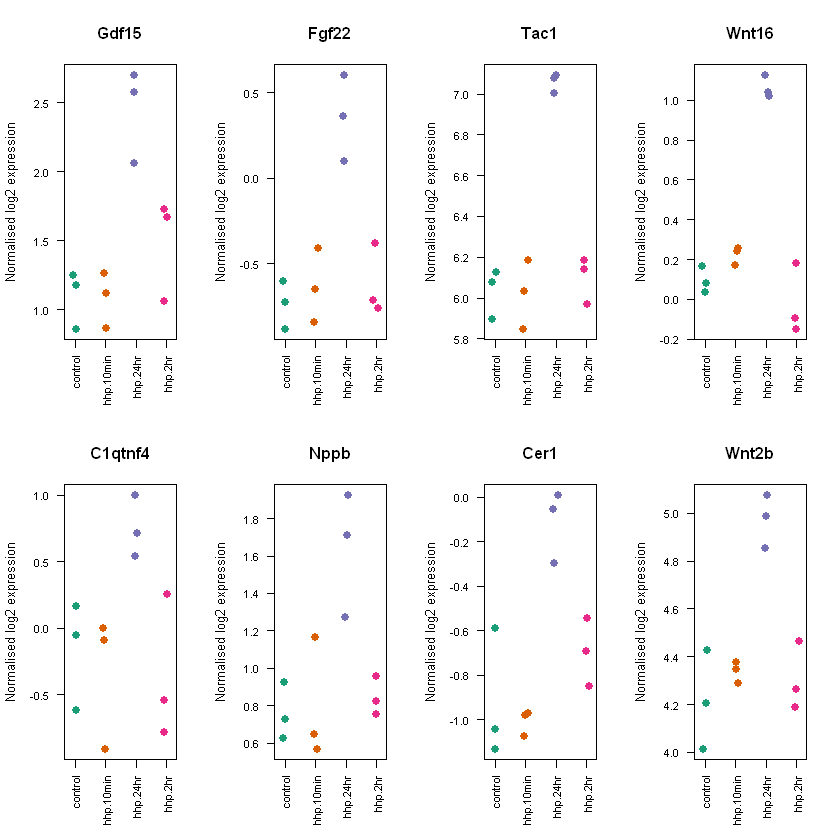

In [ ]:
par(mfrow = c(2, 4))
gene_list <- c("Gdf15", "Fgf22", "Tac1", "Wnt16", "C1qtnf4", "Nppb", "Cer1", "Wnt2b")
for (i in gene_list) {
    stripchart(v$E[i, ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8, pch = 16,
        cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
        main = i)
}

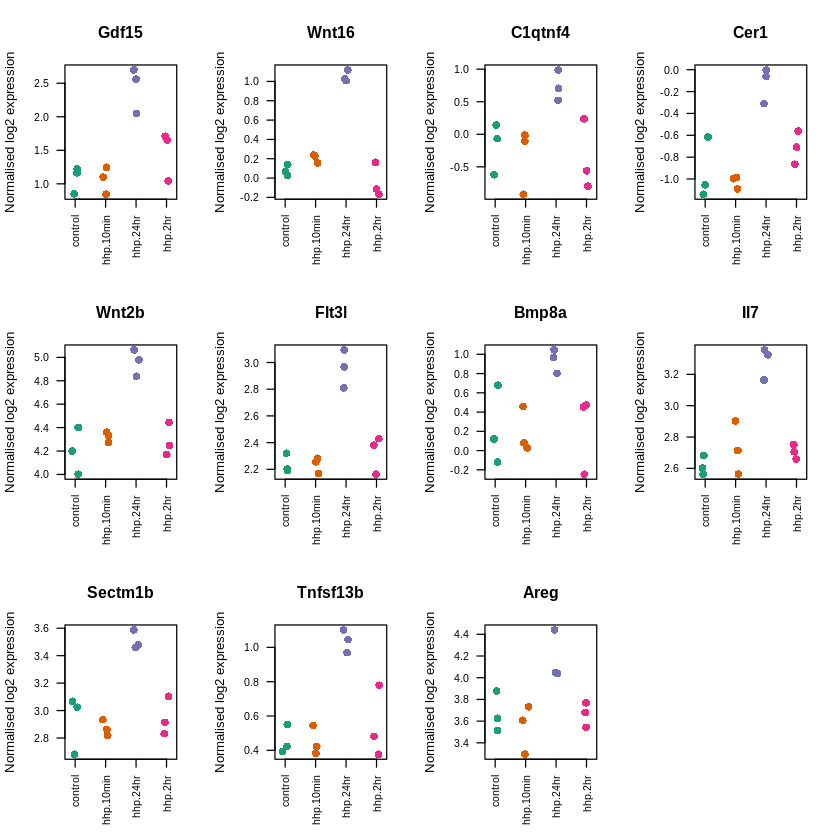

In [ ]:
par(mfrow = c(3, 4))
gene_list <- c("Gdf15", "Wnt16", "C1qtnf4", "Cer1", "Wnt2b", "Flt3l", "Bmp8a", "Il7",
    "Sectm1b", "Tnfsf13b", "Areg")
for (i in gene_list) {
    stripchart(v$E[i, ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8, pch = 16,
        cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
        main = i)
}

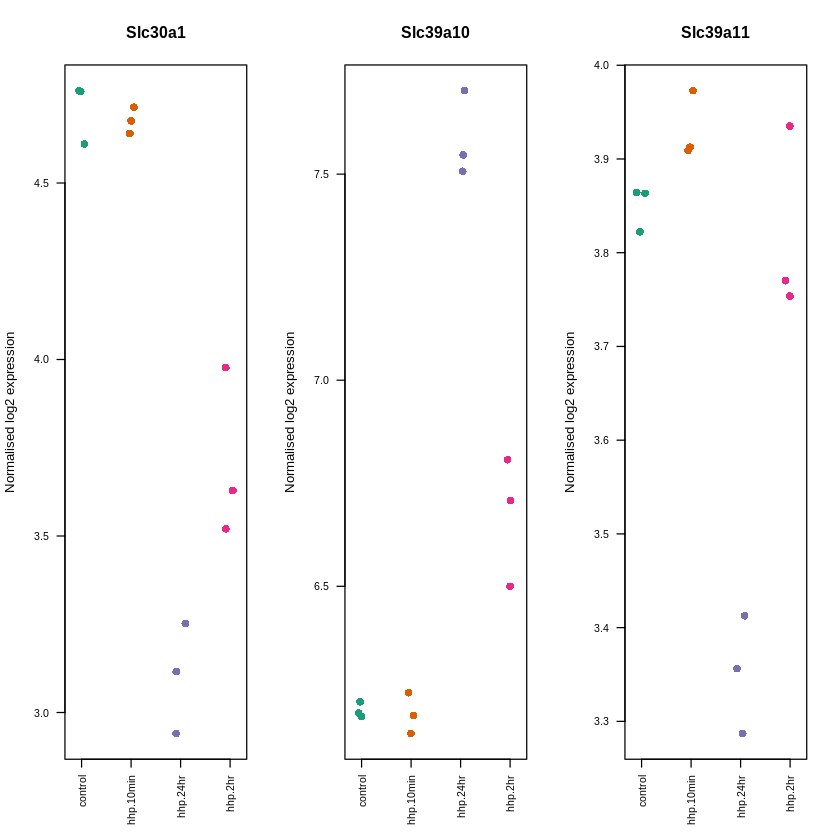

In [ ]:
par(mfrow = c(1, 3))
gene_list <- c("Slc30a1", "Slc39a10", "Slc39a11")
for (i in gene_list) {
    stripchart(v$E[i, ] ~ treatment, vertical = TRUE, las = 2, cex.axis = 0.8, pch = 16,
        cex = 1.3, col = nice.col, method = "jitter", ylab = "Normalised log2 expression",
        main = i)
}

## Testing for differential expression, contro vs HHP.2h

In [ ]:
# Now that we have the voom transformed data we can use limma to test for
# differential expression.  Fit the linear model
fit <- lmFit(v)
names(fit)
# The comparison of interest can be specified using the makeContrasts function.
cont.matrix <- makeContrasts(convs2h = hhp.2hr - control, levels = design)
cont.matrix
# Now we can apply the contrasts matrix to the fit object to get the statistics
# and estimated parameters of our comparison that we are interested in.  Now we
# can apply the contrasts matrix to the fit object to get the statistics and
# estimated parameters of our comparison that we are interested in.
fit.cont.B <- contrasts.fit(fit, cont.matrix)
# The final step is to call the eBayes function, which performs empirical Bayes
# shrinkage on the variances, and estimates moderated t-statistics and the
# associated p-values.
fit.cont.B <- eBayes(fit.cont.B)
# Check the dimensions of the fit object
dim(fit.cont.B)
# We can use the limma decideTests function to generate a quick summary of DE
# genes for the contrasts.
summa.fit.B <- decideTests(fit.cont.B)
summary(summa.fit.B)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "genes"           
 [9] "Amean"            "method"           "design"

,convs2h
control,-1
hhp.10min,0
hhp.24hr,0
hhp.2hr,1


[1] 17383     1

       convs2h
Down         1
NotSig   17382
Up           0

In [ ]:
seq_tab <- topTable(fit.cont.B,adjust="BH",n=Inf)
head(seq_tab)

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Slc30a1,Slc30a1,22782,"solute carrier family 30 (zinc transporter), member 1",-0.9946236,4.049712,-10.432454,5.384878e-08,0.0009360533,8.0607032
Slc39a10,Slc39a10,227059,"solute carrier family 39 (zinc transporter), member 10",0.4725486,6.661529,6.784704,8.696133e-06,0.0755824439,3.8989819
Zfp568,Zfp568,243905,zinc finger protein 568,-0.2886299,4.288300,-5.050879,1.756632e-04,0.3442418688,1.0553834
Fam199x,Fam199x,245622,"family with sequence similarity 199, X-linked",-0.2022450,5.645670,-4.920506,2.238484e-04,0.3442418688,0.7599280
Cebpb,Cebpb,12608,"CCAAT/enhancer binding protein (C/EBP), beta",0.4798502,4.943706,4.841942,2.593218e-04,0.3442418688,0.6621381
Zfp111,Zfp111,56707,zinc finger protein 111,-0.3970190,3.963069,-4.747447,3.098219e-04,0.3442418688,0.5282534


In [ ]:
write.csv(seq_tab, "RNA-seqResults-Convs2h.csv")

## Testing for differential expression, contro vs HHP.10min

In [ ]:
# Now that we have the voom transformed data we can use limma to test for
# differential expression.  Fit the linear model
fit <- lmFit(v)
names(fit)
# The comparison of interest can be specified using the makeContrasts function.
cont.matrix <- makeContrasts(convs2h = hhp.10min - control, levels = design)
cont.matrix
# Now we can apply the contrasts matrix to the fit object to get the statistics
# and estimated parameters of our comparison that we are interested in.  Now we
# can apply the contrasts matrix to the fit object to get the statistics and
# estimated parameters of our comparison that we are interested in.
fit.cont.B <- contrasts.fit(fit, cont.matrix)
# The final step is to call the eBayes function, which performs empirical Bayes
# shrinkage on the variances, and estimates moderated t-statistics and the
# associated p-values.
fit.cont.B <- eBayes(fit.cont.B)
# Check the dimensions of the fit object
dim(fit.cont.B)
# We can use the limma decideTests function to generate a quick summary of DE
# genes for the contrasts.
summa.fit.B <- decideTests(fit.cont.B)
summary(summa.fit.B)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "genes"           
 [9] "Amean"            "method"           "design"

,convs2h
control,-1
hhp.10min,1
hhp.24hr,0
hhp.2hr,0


[1] 17383     1

       convs2h
Down         0
NotSig   17383
Up           0

In [ ]:
seq_tab <- topTable(fit.cont.B,adjust="BH",n=Inf)
head(seq_tab)

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bcam,Bcam,57278,basal cell adhesion molecule,0.1727756,9.090271,4.387471,0.0006160040,0.8339749,-0.1602508
Brinp2,Brinp2,240843,bone morphogenic protein/retinoic acid inducible neural-specific 2,0.1858020,5.006225,4.206182,0.0008752740,0.8339749,-0.7224365
Ldlr,Ldlr,16835,low density lipoprotein receptor,0.1331152,7.379872,3.974252,0.0013778236,0.8339749,-0.8694286
Wdr55,Wdr55,67936,WD repeat domain 55,-0.2193450,4.235121,-4.208161,0.0008719087,0.8339749,-0.9543439
Cul9,Cul9,78309,cullin 9,0.1534526,5.553635,3.851476,0.0017548116,0.8339749,-1.1551319
Gpr162,Gpr162,14788,G protein-coupled receptor 162,0.2717658,3.405287,4.233774,0.0008295375,0.8339749,-1.2155350


In [ ]:
write.csv(seq_tab, "RNA-seqResults-Convs10min.csv")

## Venn Diagram

In [ ]:
summary(summa.fit.B)
summary(summa.fit.L)

       convs24h
Down       1013
NotSig    15443
Up          927

       treatmenthhp.24hr
Down                 958
NotSig             15676
Up                   749

In [ ]:
rownames_to_column(as.data.frame(summa.fit.L))

ERROR: Error: Column name `rowname` must not be duplicated.


In [ ]:
summa.fit.B <- rownames_to_column(as.data.frame(summa.fit.B)) %>%
    rename(ComBat_seq = "convs24h")
summa.fit.L <- rownames_to_column(as.data.frame(summa.fit.L)) %>%
    rename(edgeR = "treatmenthhp.24hr")
c3 <- left_join(summa.fit.B, summa.fit.L, by = "rowname")
c3 <- column_to_rownames(c3, var = "rowname")
head(c3)
dim(c3)

,ComBat_seq,edgeR
,<dbl>,<int>
Xkr4,0,0
Gm38717,0,0
Sox17,0,0
Mrpl15,0,0
Lypla1,0,0
Tcea1,0,0


[1] 17383     2

,ComBat_seq,edgeR
,<dbl>,<int>
Xkr4,0,0
Gm38717,0,0
Sox17,0,0
Mrpl15,0,0
Lypla1,0,0
Tcea1,0,0


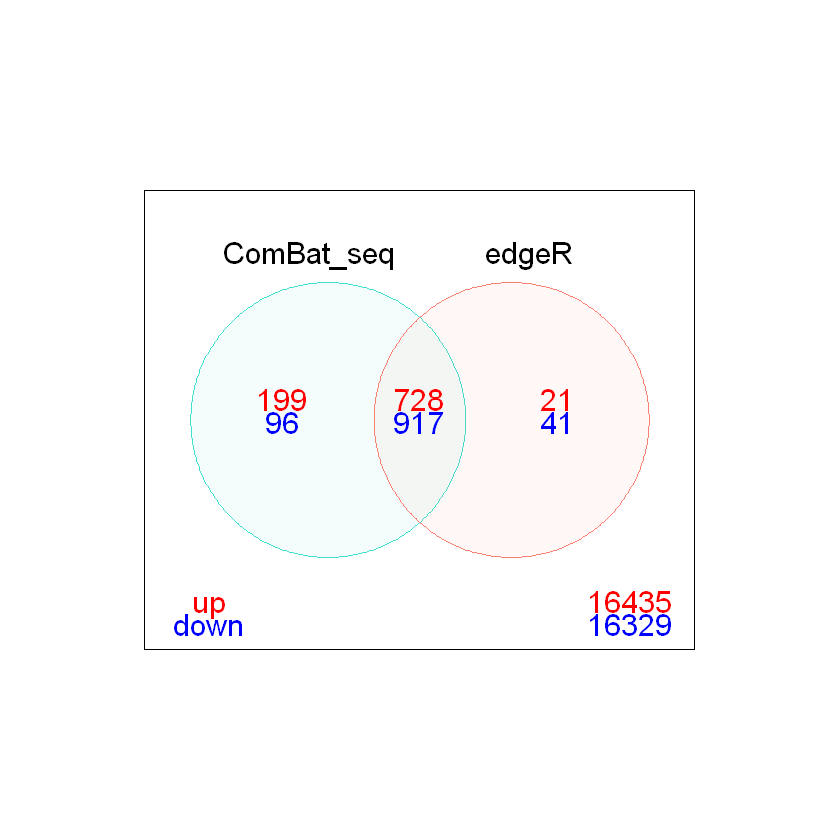

In [ ]:
# Add another contrast to the contrasts matrix, check out the vennDiagram
# function c3 <- cbind(summa.fit.B, summa.fit.L)
head(c3)
vennDiagram(c3, include = c("up", "down"), names = c("ComBat_seq", "edgeR"), counts.col = c("red",
    "blue"), circle.col = c("turquoise", "salmon"))

In [ ]:
summa.fit.B.common <- summa.fit.B[summa.fit.B == summa.fit.L, ] 
head(summa.fit.B.common)

,convs24h
Xkr4,-1
Gm38717,0
Sox17,0
Mrpl15,0
Tcea1,-1
Rgs20,0


In [ ]:
saveRDS(summa.fit.B.common, "summa.fit.B.rds")

## Testing relative to a threshold (TREAT)

       convs24h
Down        505
NotSig    16534
Up          344

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calr3,Calr3,73316,calreticulin 3,1.7975604,2.1800568,19.48549,7.400401e-12,1.286412e-07
Slc39a10,Slc39a10,227059,"solute carrier family 39 (zinc transporter), member 10",1.3868866,6.6615286,16.12130,9.435794e-11,8.201120e-07
Pdrg1,Pdrg1,68559,p53 and DNA damage regulated 1,0.9797539,5.4091471,14.37542,4.314668e-10,2.500062e-06
Mt2,Mt2,17750,metallothionein 2,-2.9701904,3.9449340,-13.49069,1.062096e-09,4.560189e-06
Sprn,Sprn,212518,shadow of prion protein,-1.2785258,4.7139611,-13.20955,1.311681e-09,4.560189e-06
Prrg2,Prrg2,65116,proline-rich Gla (G-carboxyglutamic acid) polypeptide 2,1.3919542,3.2418570,12.89007,1.806935e-09,5.234991e-06
Slc30a1,Slc30a1,22782,"solute carrier family 30 (zinc transporter), member 1",-1.6033920,4.0497118,-12.45505,2.831572e-09,7.031603e-06
Mt1,Mt1,17748,metallothionein 1,-1.8700204,5.5086662,-11.45859,8.336305e-09,1.811375e-05
2210409E12Rik,2210409E12Rik,72381,"transcription elongation factor B (SIII), polypeptide 2 pseudogene",2.3957289,0.3388141,11.17852,1.169096e-08,2.258044e-05


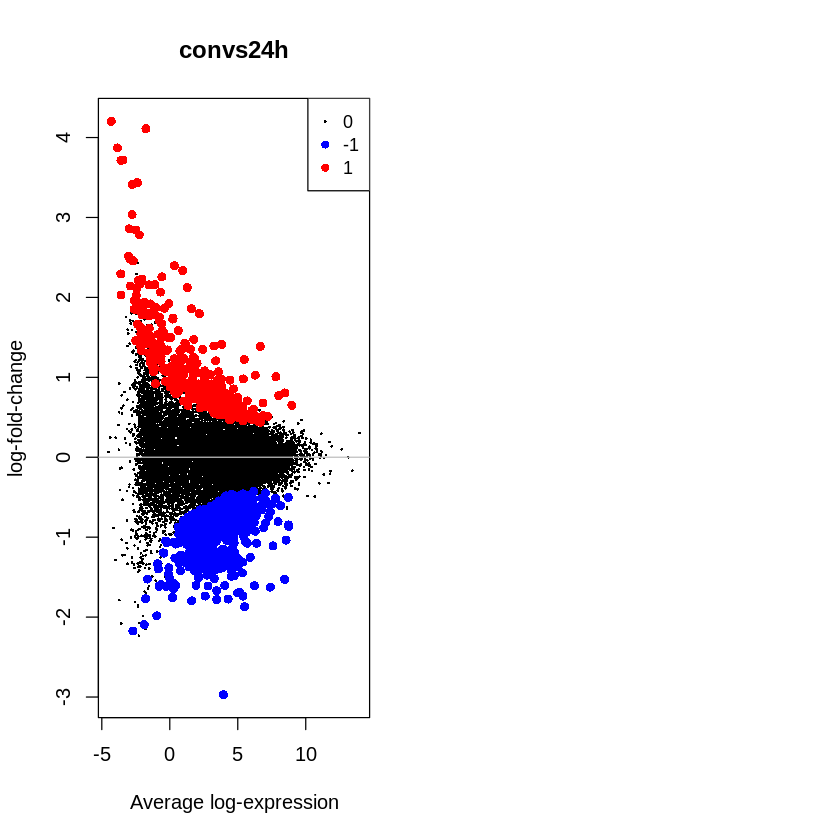

In [ ]:
# In other words, you are not controlling the false discovery rate at 5% any
# more. There is a function called treat in the limma package that performs
# this style of analysis correctly (McCarthy and Smyth 2009).  Let's decide
# that we are only interested in genes that have a absolute logFC of 1.  This
# corresponds to a fold change of 2, or 0.5 (i.e.  double or half).  We can
# perform a treat analysis which ranks our genes according to p-value AND
# logFC.  This is easy to do after our analysis, we just give the treat
# function the fit.cont object and specify our cut-off.
fit.treat.B <- treat(fit.cont.B, lfc = 0.3)
res.treat.B <- decideTests(fit.treat.B)
summary(res.treat.B)

# Calculate the treat seperately
topTable(fit.treat.B, coef = 1, sort.by = "p")
# Notice that much fewer genes are highlighted in the MAplot
par(mfrow = c(1, 2))
plotMD(fit.treat.B, coef = 1, status = res.treat.B[, "convs24h"], values = c(-1,
    1), hl.col = c("blue", "red"))
abline(h = 0, col = "grey")

# An interactive version of the mean-difference plots is possible via the
# glMDPlot function in the Glimma package.
glMDPlot(fit.treat.B, coef = 1, counts = v$E, groups = treatment, status = res.treat.B,
    side.main = "ENTREZID", main = "convs24h", folder = "md")

In [ ]:
topTable(fit.treat.B, coef = 1, sort.by = "p")

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calr3,Calr3,73316,calreticulin 3,1.7975604,2.1800568,19.48549,7.400401e-12,1.286412e-07
Slc39a10,Slc39a10,227059,"solute carrier family 39 (zinc transporter), member 10",1.3868866,6.6615286,16.12130,9.435794e-11,8.201120e-07
Pdrg1,Pdrg1,68559,p53 and DNA damage regulated 1,0.9797539,5.4091471,14.37542,4.314668e-10,2.500062e-06
Mt2,Mt2,17750,metallothionein 2,-2.9701904,3.9449340,-13.49069,1.062096e-09,4.560189e-06
Sprn,Sprn,212518,shadow of prion protein,-1.2785258,4.7139611,-13.20955,1.311681e-09,4.560189e-06
Prrg2,Prrg2,65116,proline-rich Gla (G-carboxyglutamic acid) polypeptide 2,1.3919542,3.2418570,12.89007,1.806935e-09,5.234991e-06
Slc30a1,Slc30a1,22782,"solute carrier family 30 (zinc transporter), member 1",-1.6033920,4.0497118,-12.45505,2.831572e-09,7.031603e-06
Mt1,Mt1,17748,metallothionein 1,-1.8700204,5.5086662,-11.45859,8.336305e-09,1.811375e-05
2210409E12Rik,2210409E12Rik,72381,"transcription elongation factor B (SIII), polypeptide 2 pseudogene",2.3957289,0.3388141,11.17852,1.169096e-08,2.258044e-05


## Select gene for GO analysis

In [ ]:
sum((c3$ComBat_seq == 1) & (c3$edgeR == 1))

[1] 721

In [ ]:
select_genes <- (c3$ComBat_seq == -1) & (c3$edgeR == -1)
head(select_genes)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [ ]:
forGO <- fit.cont.B[select_genes ,]$coefficients
# choose the gene for further GO analysis
# differential genes after ComBat-seq correction
dim(forGO)

[1] 906   1

In [ ]:
write.csv(forGO, "forGO_down.csv")

In [ ]:
select_genes <- (c3$ComBat_seq == c3$edgeR)
head(select_genes)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [ ]:
summa.fit.B <- summa.fit.B[select_genes, ]

In [ ]:
saveRDS(summa.fit.B, "./summa.fit.B_neuron.rds")

## Batch effect correction with limma

In [ ]:
batch <- sampleinfo$Batch
batch <- factor(batch)
treatment <- sampleinfo$Treatment
treatment <- factor(treatment)
design <- model.matrix(~treatment)
design

,(Intercept),treatmenthhp.10min,treatmenthhp.24hr,treatmenthhp.2hr
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,1,0,0
5,1,1,0,0
6,1,1,0,0
7,1,0,0,1
8,1,0,0,1
9,1,0,0,1
10,1,0,1,0


In [ ]:
# TMM-normalization.
x <- calcNormFactors(x)
head(x$counts)
# Convert to CPM and log2 transformation.
logCPM <- cpm(x, log = TRUE, prior.count = 1)
head(logCPM)
# Remove batch effect.
logCPM_no_batch <- removeBatchEffect(logCPM, batch = batch, design = design)
head(logCPM_no_batch)

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,2502,1912,2264,2488,2131,2184,1837,1818,1850,1682,1262,1342
Gm38717,31,39,15,39,63,20,34,40,17,37,43,10
Sox17,161,234,335,159,284,232,107,232,259,189,199,202
Mrpl15,826,1111,1533,866,1044,1213,659,874,1009,749,929,903
Lypla1,1763,1875,1920,1776,2013,1559,1429,1513,1267,1418,1523,1219
Tcea1,3228,3562,5129,3207,3925,3901,2611,3165,3613,2517,2923,3002


,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,5.9808820,5.50668169,5.382669,5.91624106,5.559244,5.610584,5.8280122,5.5986147,5.577988,5.53777863,5.1062911,5.122419
Gm38717,-0.3096271,-0.07173013,-1.732744,-0.04264635,0.503735,-1.083632,0.1051319,0.1246373,-1.109807,0.06488019,0.2600088,-1.815977
Sox17,2.0310899,2.48177294,2.630924,1.95694585,2.656569,2.381914,1.7364208,2.6334633,2.746049,2.39008835,2.4469189,2.396207
Mrpl15,4.3831550,4.72402133,4.820559,4.39479508,4.530619,4.762773,4.3501286,4.5427595,4.704009,4.37159098,4.6646994,4.551328
Lypla1,5.4760685,5.47850519,5.145054,5.43012201,5.477105,5.124524,5.4658451,5.3338223,5.032222,5.29160085,5.3773183,4.983835
Tcea1,6.3483143,6.40392463,6.561997,6.28234701,6.440062,6.447135,6.3350776,6.3981559,6.543297,6.11905239,6.3174427,6.283394


,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Xkr4,5.7257707,5.6245910,5.5198710,5.6611297,5.6771532,5.74778620,5.5729009,5.716524,5.71519016,5.282667,5.2242004,5.2596212
Gm38717,-0.6897093,-0.7015404,-0.7228518,-0.4227285,-0.1260752,-0.07373935,-0.2749502,-0.505173,-0.09991431,-0.315202,-0.3698014,-0.8060844
Sox17,2.3764838,2.3011221,2.4661806,2.3023398,2.4759178,2.21717053,2.0818147,2.452812,2.58130572,2.735482,2.2662681,2.2314636
Mrpl15,4.5749407,4.6751996,4.6775948,4.5865808,4.4817977,4.61980885,4.5419143,4.493938,4.56104485,4.563377,4.6158776,4.4083641
Lypla1,5.3614945,5.3631527,5.3749804,5.3155480,5.3617522,5.35445019,5.3512711,5.218470,5.26214805,5.177027,5.2619658,5.2137619
Tcea1,6.4504664,6.3873784,6.4763909,6.3844991,6.4235153,6.36152930,6.4372298,6.381610,6.45769121,6.221205,6.3008965,6.1977884


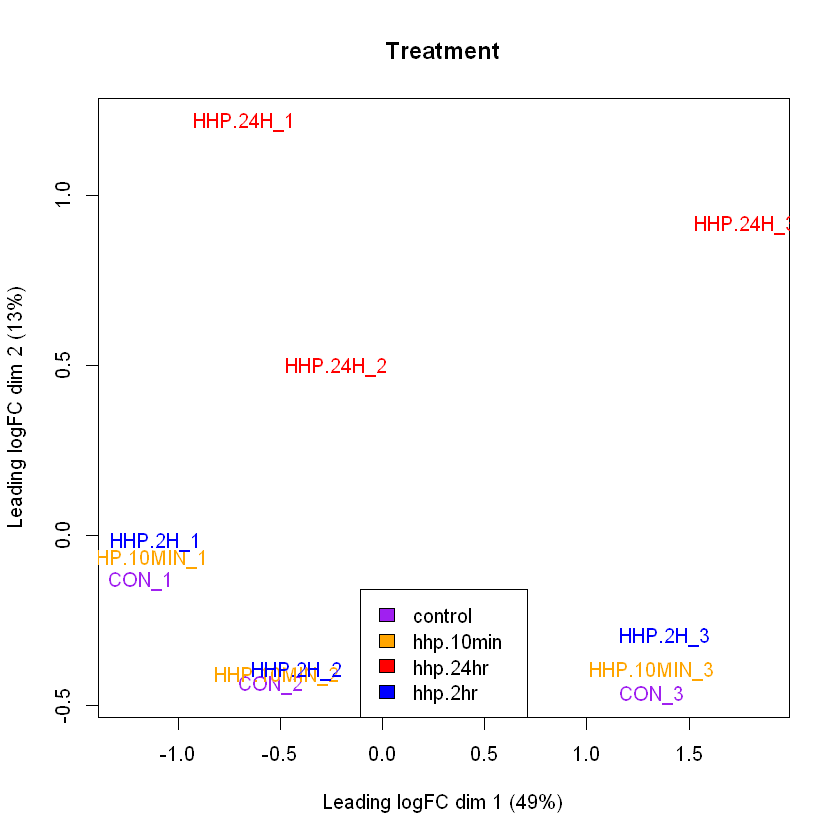

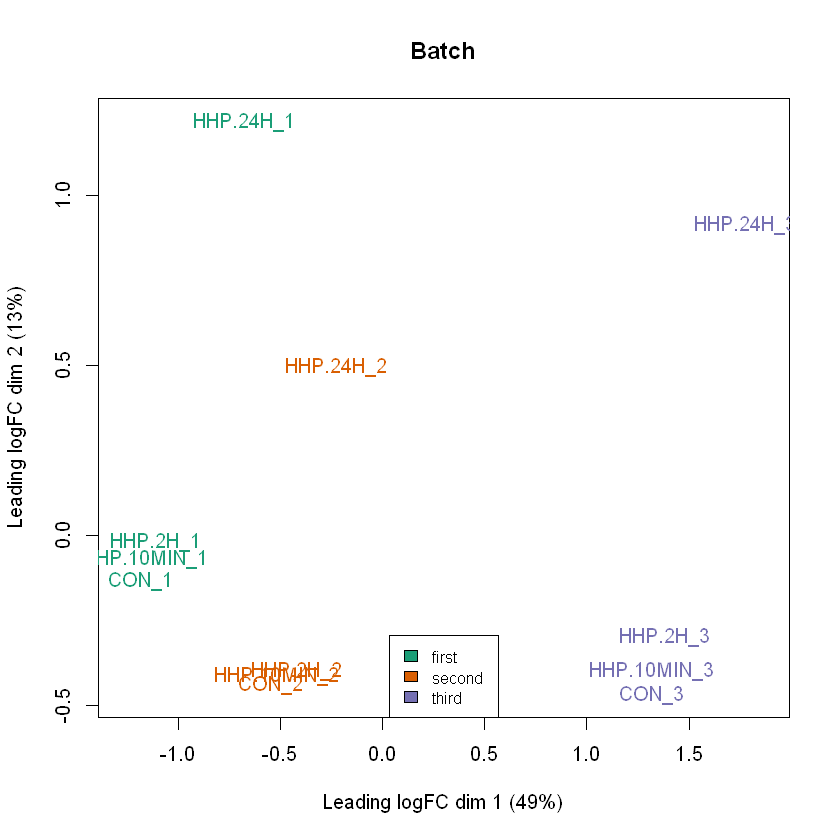

In [ ]:
# Redo the MDSplot with corrected information
col.cell <- c("purple", "orange", "red", "blue")[sampleinfo$Treatment]
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
char.celltype <- c(1, 4)[sampleinfo$Treatment]
plotMDS(logCPM, col = col.cell)
legend("bottom", fill = c("purple", "orange", "red", "blue"), legend = levels(sampleinfo$Treatment))
title("Treatment")

plotMDS(logCPM, col = col.status)
legend("bottom", fill = c("#1B9E77", "#D95F02", "#7570B3"), legend = levels(sampleinfo$Batch),
    cex = 0.8)
title("Batch")

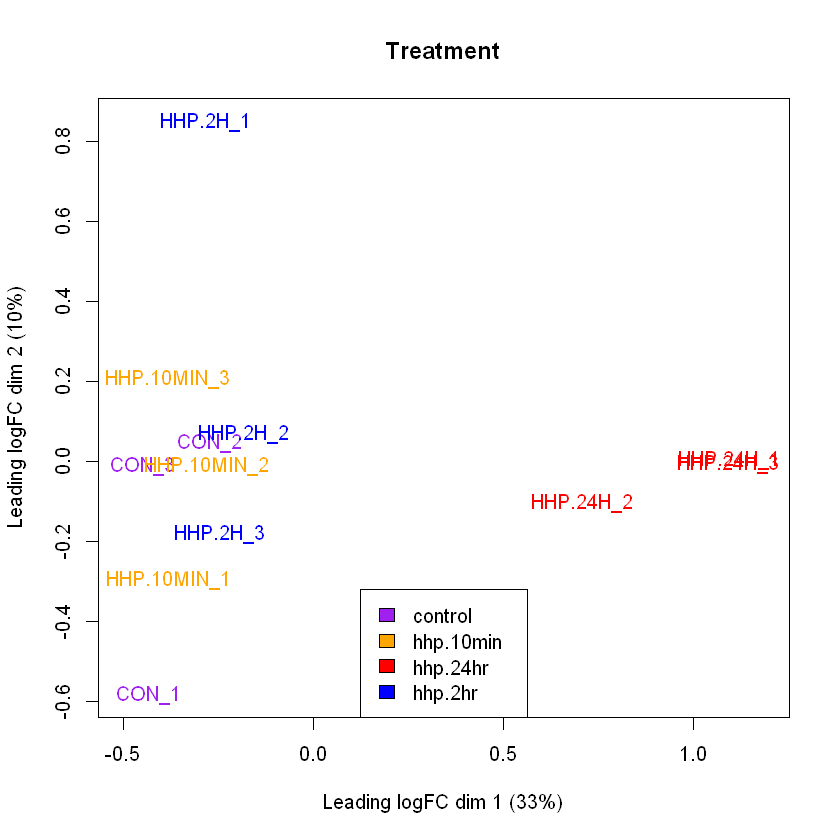

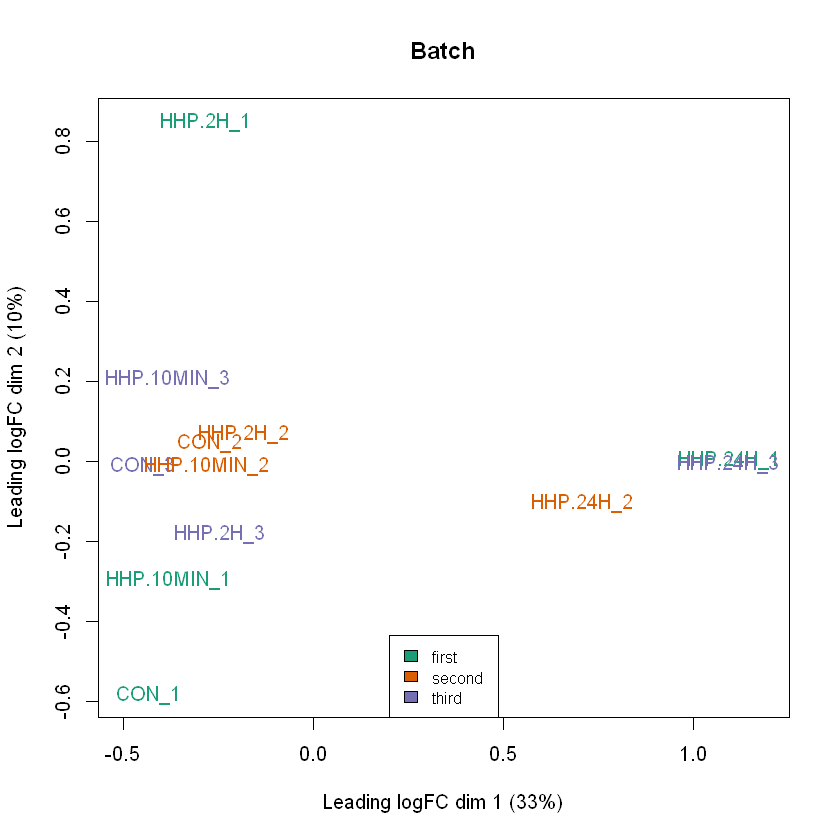

In [ ]:
# Redo the MDSplot with corrected information
col.cell <- c("purple", "orange", "red", "blue")[sampleinfo$Treatment]
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
char.celltype <- c(1, 4)[sampleinfo$Treatment]
plotMDS(logCPM_no_batch, col = col.cell)
legend("bottom", fill = c("purple", "orange", "red", "blue"), legend = levels(sampleinfo$Treatment))
title("Treatment")

plotMDS(logCPM_no_batch, col = col.status)
legend("bottom", fill = c("#1B9E77", "#D95F02", "#7570B3"), legend = levels(sampleinfo$Batch),
    cex = 0.8)
title("Batch")

In [ ]:
var_genes <- apply(logCPM, 1, var)
head(var_genes)
# Get the gene names for the top 500 most variable genes
select_var <- names(sort(var_genes, decreasing = TRUE))[1:50]
head(select_var)

Xkr4    Gm38717      Sox17     Mrpl15     Lypla1      Tcea1 
0.07385101 0.63517970 0.09703381 0.02785622 0.03384576 0.01474295

[1] "Gpr37l1" "Kcnj10"  "Rarres2" "Itih5"   "Gfap"    "Sfrp5"

[1] 50 12

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Gpr37l1,5.099758,4.022962,-0.5402958,5.370451,4.019068,-0.4340789,5.161417,3.800204,-0.068394515,5.099376,3.395857,-1.1028983
Kcnj10,7.781893,7.033403,2.4037602,7.838997,6.993558,2.6103926,7.510211,7.043810,2.491816482,7.427894,6.621907,2.2699968
Rarres2,4.587749,3.302127,-0.4650155,4.855278,3.438148,-0.3494426,4.666889,3.365653,0.007645797,4.431877,3.051230,-1.5739455
Itih5,8.236656,7.049540,3.2010296,8.337164,7.050265,3.3846916,8.131582,7.022388,3.211590953,7.625161,6.286522,2.2543957
Gfap,3.370849,3.616362,-1.0996508,3.342293,3.761186,-1.2272919,3.075933,3.661299,-0.420358969,2.733295,2.911780,-2.1069628
Sfrp5,4.848770,2.333201,-0.1979359,5.046409,2.229869,-0.5239915,4.733780,2.490328,-1.031610990,4.477284,2.318698,-0.2710487


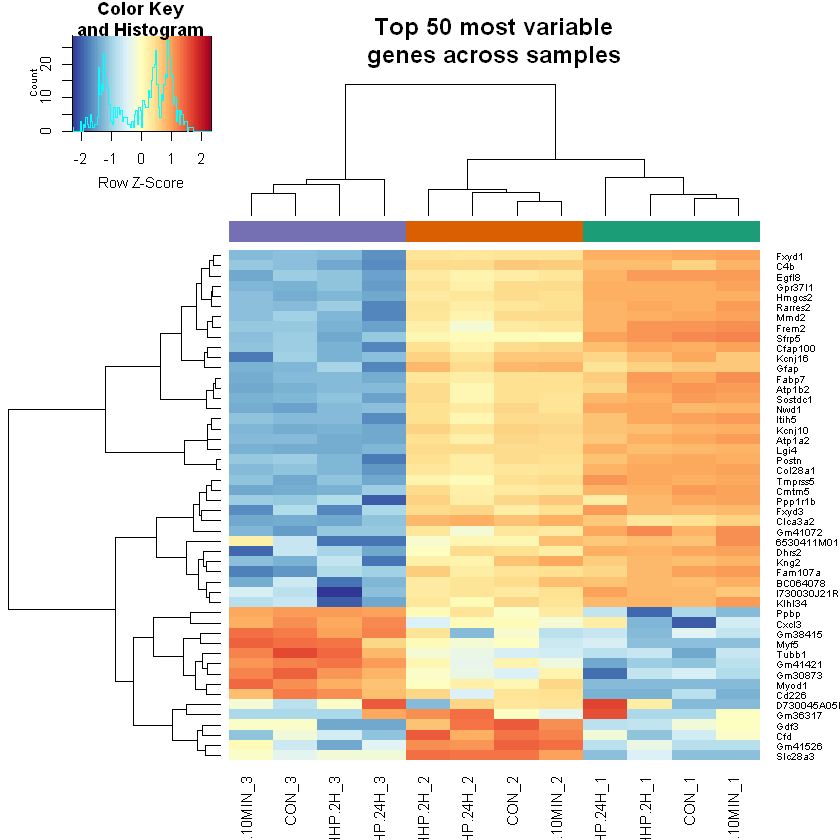

In [ ]:
# Subset logcounts matrix
highly_variable_lcpm <- logCPM[select_var, ]
dim(highly_variable_lcpm)
head(highly_variable_lcpm)
# Get some nicer colours
mypalette <- brewer.pal(11, "RdYlBu")
morecols <- colorRampPalette(mypalette)
# Set up colour vector for celltype variable
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
# Plot the heatmap
heatmap.2(highly_variable_lcpm, col = rev(morecols(100)), trace = "none", main = "Top 50 most variable
genes across samples",
    ColSideColors = col.status, scale = "row")

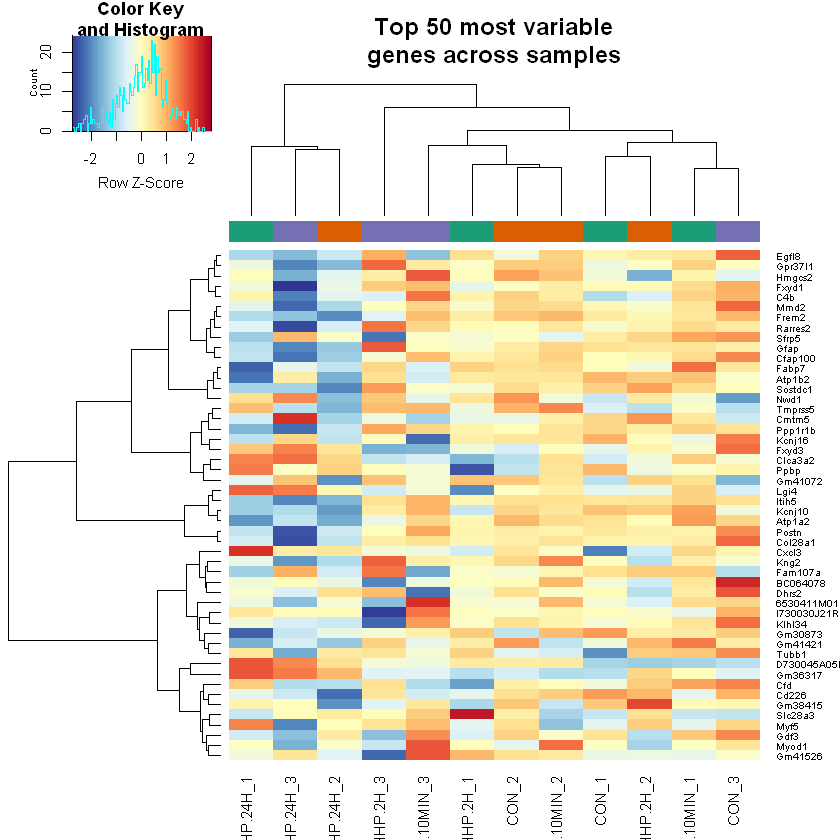

In [ ]:
# Subset logcounts matrix
highly_variable_lcpm <- logCPM_no_batch[select_var, ]
# Get some nicer colours
mypalette <- brewer.pal(11, "RdYlBu")
morecols <- colorRampPalette(mypalette)
# Set up colour vector for celltype variable
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
# Plot the heatmap
heatmap.2(highly_variable_lcpm, col = rev(morecols(100)), trace = "none", main = "Top 50 most variable
genes across samples",
    ColSideColors = col.status, scale = "row")

## Differential expression after batch effect correction with edgeR

In [ ]:
x <- readRDS("./output/x_without_correction.rds")
summary(x)

        Length Class      Mode   
samples      4 data.frame list   
counts  208596 -none-     numeric
genes        3 data.frame list   

In [ ]:
# Create the design matrix Look at group variable again
treatment <- sampleinfo$Treatment
treatment <- factor(treatment)
batch <- sampleinfo$Batch
batch <- factor(batch)
treatment
batch

[1] control   control   control   hhp.10min hhp.10min hhp.10min hhp.2hr  
 [8] hhp.2hr   hhp.2hr   hhp.24hr  hhp.24hr  hhp.24hr 
Levels: control hhp.10min hhp.24hr hhp.2hr

[1] first  second third  first  second third  first  second third  first 
[11] second third 
Levels: first second third

In [ ]:
# Specify a design matrix without an intercept term Make the column names of
# the design matrix a bit nicer
design <- model.matrix(~batch + treatment)
rownames(design) <- colnames(x)
design

,(Intercept),batchsecond,batchthird,treatmenthhp.10min,treatmenthhp.24hr,treatmenthhp.2hr
CON_1,1,0,0,0,0,0
CON_2,1,1,0,0,0,0
CON_3,1,0,1,0,0,0
HHP.10MIN_1,1,0,0,1,0,0
HHP.10MIN_2,1,1,0,1,0,0
HHP.10MIN_3,1,0,1,1,0,0
HHP.2H_1,1,0,0,0,0,1
HHP.2H_2,1,1,0,0,0,1
HHP.2H_3,1,0,1,0,0,1
HHP.24H_1,1,0,0,0,1,0


[1] 0.004937699

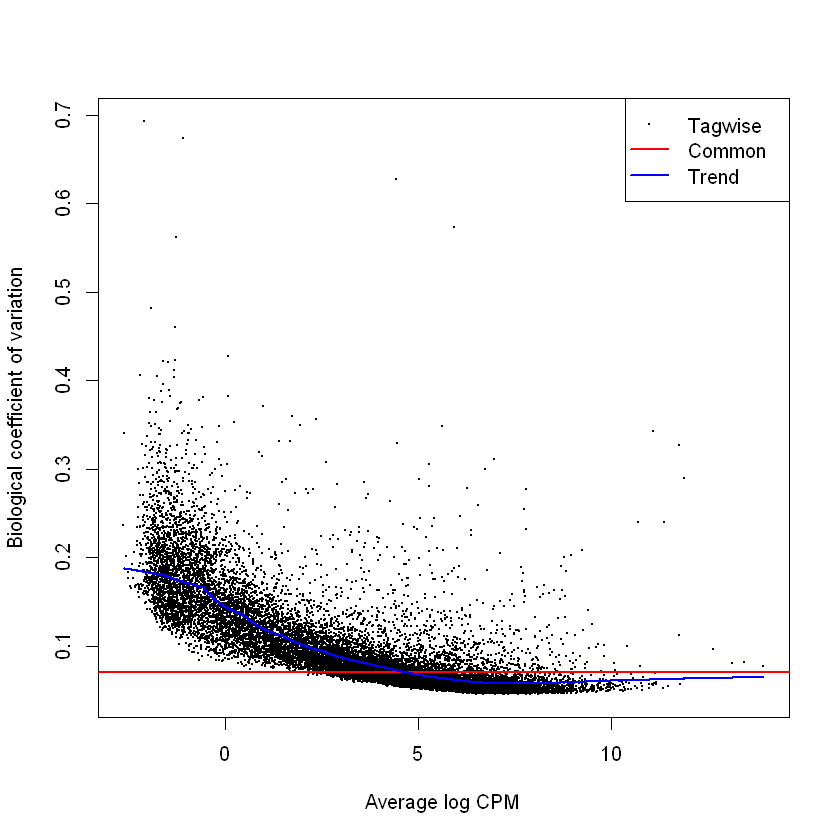

In [ ]:
x <- estimateDisp(x, design, robust = TRUE)
x$common.dispersion
plotBCV(x)

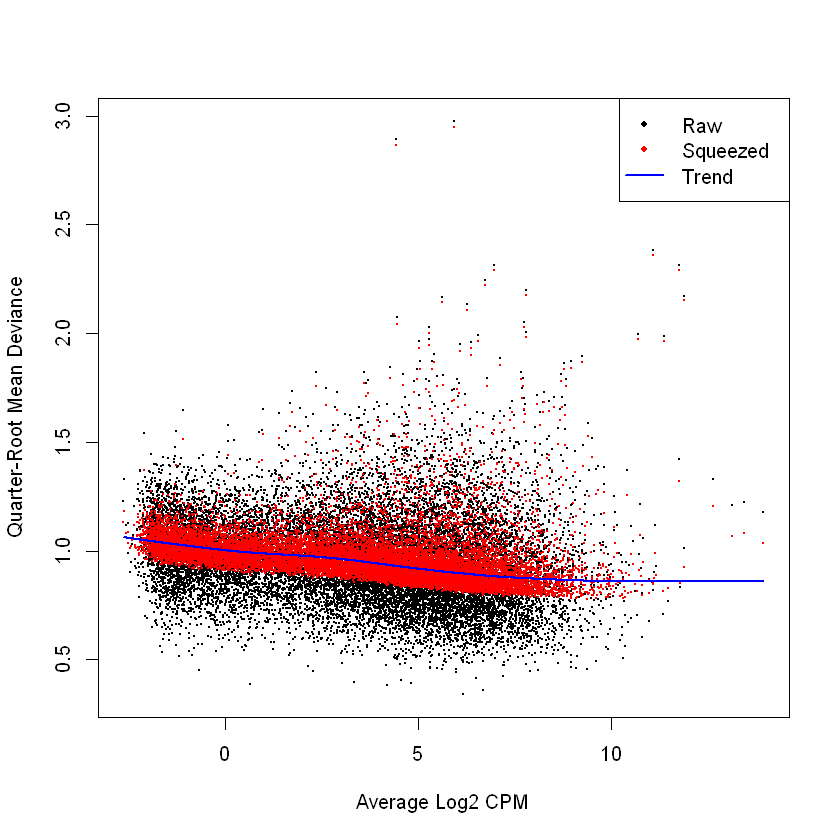

In [ ]:
fit <- glmQLFit(x, design, robust = TRUE)
plotQLDisp(fit)

In [ ]:
qlf <- glmQLFTest(fit, coef = 1:6)
topTags(qlf)

,SYMBOL,ENTREZID,GENENAME,logFC..Intercept.,logFC.batchsecond,logFC.batchthird,logFC.treatmenthhp.10min,logFC.treatmenthhp.24hr,logFC.treatmenthhp.2hr,logCPM,F,PValue,FDR
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tsc2,Tsc2,22084,TSC complex subunit 2,-13.17522,-0.026849024,-0.24221397,0.034926980,0.007103354,0.016424544,6.685711,23605.38,9.218434e-32,1.41916e-29
Kat7,Kat7,217127,K(lysine) acetyltransferase 7,-12.88026,0.007314595,0.34418358,0.011271371,0.063747515,-0.003363273,7.196504,23226.97,1.054584e-31,1.41916e-29
Ccdc127,Ccdc127,67433,coiled-coil domain containing 127,-13.46358,-0.046100707,0.09913375,0.003493908,0.091239517,0.011603709,6.514773,22891.04,1.190559e-31,1.41916e-29
Vapb,Vapb,56491,"vesicle-associated membrane protein, associated protein B and C",-12.68714,-0.146886319,-0.01276094,0.004028219,0.040921382,0.021190774,7.209740,22825.79,1.219188e-31,1.41916e-29
Dip2b,Dip2b,239667,disco interacting protein 2 homolog B,-12.60080,-0.157855322,-0.16860698,0.057451618,-0.009150128,0.009441662,7.239031,22812.12,1.225285e-31,1.41916e-29
Atp6v1c1,Atp6v1c1,66335,"ATPase, H+ transporting, lysosomal V1 subunit C1",-13.30158,-0.079496665,0.07567399,-0.028639610,0.166942643,0.042841246,6.677849,22705.53,1.273996e-31,1.41916e-29
Ankfy1,Ankfy1,11736,ankyrin repeat and FYVE domain containing 1,-12.69289,0.081404967,-0.01985270,0.039071690,-0.101705213,-0.018030861,7.241144,22703.17,1.275098e-31,1.41916e-29
Ccdc50,Ccdc50,67501,coiled-coil domain containing 50,-12.85506,-0.015806493,-0.14071477,0.013936286,-0.127912807,-0.017245730,6.994455,22627.31,1.311128e-31,1.41916e-29
B4galt6,B4galt6,56386,"UDP-Gal:betaGlcNAc beta 1,4-galactosyltransferase, polypeptide 6",-12.53762,-0.018880796,-0.11737847,0.055934321,-0.208968577,0.050789917,7.328242,22573.22,1.337509e-31,1.41916e-29


In [ ]:
FDR <- p.adjust(qlf$table$PValue, method = "BH")
sum(FDR < 0.05)

[1] 17383

In [ ]:
qlf <- glmQLFTest(fit, coef = 5)
topTags(qlf)

,SYMBOL,ENTREZID,GENENAME,logFC,logCPM,F,PValue,FDR
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calr3,Calr3,73316,calreticulin 3,1.8017774,2.415968,279.2111,7.795207e-12,7.290260e-08
Pdrg1,Pdrg1,68559,p53 and DNA damage regulated 1,0.9839440,5.483515,267.4214,1.094812e-11,7.290260e-08
Slc39a10,Slc39a10,227059,"solute carrier family 39 (zinc transporter), member 10",1.3990876,6.789966,338.2201,1.326038e-11,7.290260e-08
Sprn,Sprn,212518,shadow of prion protein,-1.2781635,4.840588,253.2742,1.677561e-11,7.290260e-08
Stat1,Stat1,20846,signal transducer and activator of transcription 1,-0.8246828,6.327814,211.1181,6.934888e-11,2.410983e-07
Sfrp1,Sfrp1,20377,secreted frizzled-related protein 1,-0.9064683,7.132292,202.6485,9.520154e-11,2.758147e-07
Adgrl1,Adgrl1,330814,adhesion G protein-coupled receptor L1,-0.6947724,7.431427,183.1990,2.070091e-10,4.923271e-07
Prrg2,Prrg2,65116,proline-rich Gla (G-carboxyglutamic acid) polypeptide 2,1.4001543,3.372958,181.0528,2.265787e-10,4.923271e-07
Aspm,Aspm,12316,abnormal spindle microtubule assembly,-1.2241697,5.104477,183.2004,2.693512e-10,5.202368e-07


In [ ]:
summa.fit.L <- decideTests(qlf, lfc = 0.5)
summary(summa.fit.L)

       treatmenthhp.24hr
Down                 958
NotSig             15676
Up                   749

In [ ]:
top <- rownames(topTags(qlf))
cpm(x)[top, ]

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Calr3,3.58308,3.707471,2.578339,3.421036,3.803797,2.638545,3.678375,3.942739,2.838826,13.139782,12.41047,8.896850
Pdrg1,34.84672,31.442207,40.406253,34.744137,32.420733,40.047750,34.836375,32.900558,44.079222,72.517242,59.48843,79.215683
Slc39a10,75.06806,81.469301,64.734722,73.734241,78.973013,68.423292,106.085570,122.011786,78.016093,189.864327,204.75911,185.951942
Sprn,26.57031,31.109485,43.058259,27.465338,30.916906,42.395608,28.406946,28.478297,41.627509,9.716814,13.44695,18.675603
Stat1,122.50603,104.023084,52.634946,115.902754,97.151623,52.435497,120.551784,90.789556,50.866596,66.554652,60.74311,29.803150
Sfrp1,243.34668,160.870974,76.281997,230.179909,167.676669,71.285443,235.786926,169.564415,63.770350,135.621320,94.61960,35.016756
Adgrl1,179.20449,171.470539,216.341047,195.557085,176.765974,220.497412,190.255444,170.550099,199.750104,108.955292,110.41227,130.288269
Prrg2,6.98953,6.939625,7.679766,7.181749,6.391263,8.698255,7.634946,8.071959,7.948712,21.145111,16.96552,19.012801
Aspm,73.17559,39.760251,16.409285,64.344589,35.362041,15.451142,63.954267,37.482660,13.187636,27.024888,20.67502,6.614276
Ncapd2,66.84211,52.974058,29.374646,62.694728,53.120464,30.119665,64.912499,49.630558,26.762385,33.649988,32.04902,15.018297


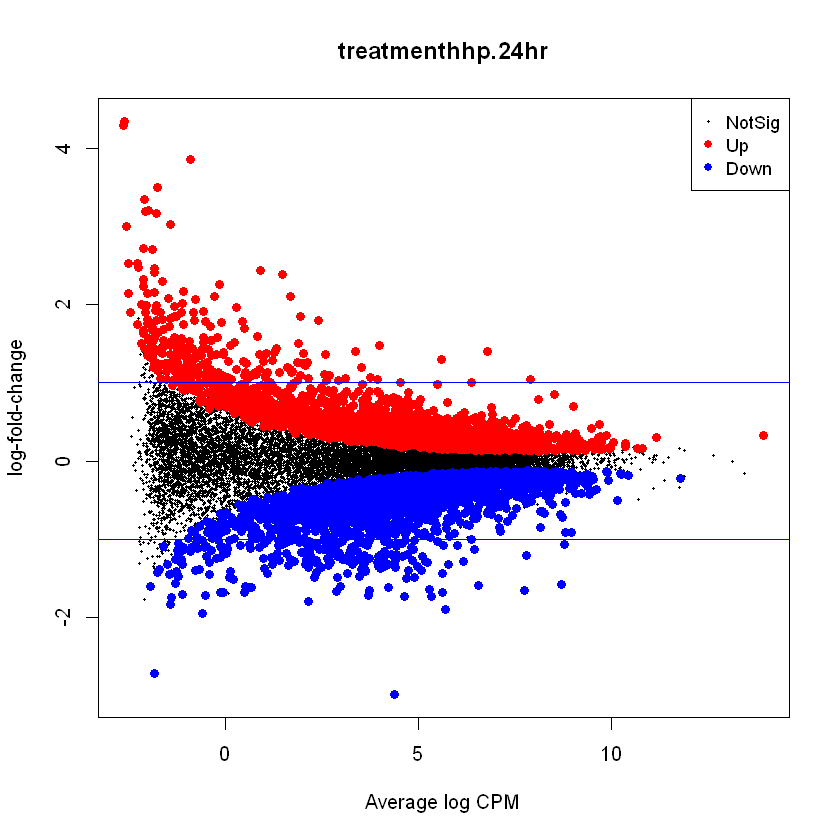

In [ ]:
plotMD(qlf)
abline(h = c(-1, 1), col = "blue")

In [ ]:
saveRDS(summa.fit.L, "./output/for_publication/summa.fit.L.rds")

## Genes of interests with heatmaps

In [ ]:
receptor_ligand_activity <- c("Gdf15", "Fgf22", "Tac1", "Wnt16", "C1qtnf4", "Nppb",
    "Cer1", "Wnt2b", "Sema3e", "Flt3l", "Bmp8a", "Mdk", "Pomc", "Il7")
cytokine_activity <- c("Gdf15", "Wnt16", "C1qtnf4", "Cer1", "Wnt2b", "Flt3l", "Bmp8a",
    "Il7")
atp_activity <- c("Helz", "Dna2", "Abcc8", "Mcm8", "Entpd2", "Rfc5", "Mfsd2a", "Kifc1",
    "Atad5", "Kif18a", "Brip1", "Atp8b3", "Mcm4", "Kif20b", "Rad51b", "Atp10a", "Rad54b",
    "Hells", "Mcm2", "Pif1", "Ercc6l", "Mcm6", "Polq", "Mcm3", "Katnal2", "Rad51",
    "Fignl1", "Chtf18", "Kif20a", "Cenpe", "Kif18b", "Kif23", "Kif14", "Kif2c", "Kif15",
    "Kif11", "Mcm5", "Rad54l", "Top2a")

In [ ]:
slcs <- c("Slc30a1", "Slc39a10", "Slc39a11")

In [ ]:
tubulin_binding <- c("Traf3ip1", "Haus7", "Kifc1", "Kif18a", "Rgs14", "Kif20b", "Gli1",
    "Knstrn", "Tpx2", "Kif24", "Birc5", "Brca2", "Nusap1", "Spag5", "Ska1", "Kif20a",
    "Prc1", "Cenpe", "Kif18b", "Racgap1", "Fam83d", "Kif4", "Plk1", "Kif23", "Dlgap5",
    "Kif14", "Kif2c", "Kif15", "Kif11", "Dcx")

In [ ]:
ion_channels_up <- c("Abcc9", "Atp6v1f", "Atp6v1h", "Atp13a4", "Cacna1i", "Clca1",
    "Clca2", "Clcn2", "Cnr1", "Hrh1", "Kcna4", "Kcnh3", "Kcnh5", "Kcnj6", "Kcnj8",
    "Kcnk6", "Kcnmb1", "Kcnn1", "Kcns3", "Panx1", "Pex5l", "Pkd1l2", "Pkd2l1", "Psen1",
    "Scn1b", "Scn5a", "Sfxn4", "Slc2a3", "Slc5a7", "Slc8b1", "Slc9a8", "Slc15a2",
    "Slc16a12", "Slc22a4", "Slc25a2", "Slc25a20", "Slc25a38", "Slc26a11", "Slc35b3",
    "Slc38a6", "Slc39a10", "Slc45a1", "Slc52a2", "Slc52a3", "Stim1", "Tmem38a", "Tpcn2",
    "Trpa1", "Trpm1", "Trpv2")

In [ ]:
ion_channels_down <- c("Abcc8", "Atp1a2", "Cachd1", "Cacna1d", "Cacna1e", "Cacng2",
    "Clcc1", "Clcn5", "Clic4", "Cnnm2", "Cpox", "Gabra5", "Gabrb3", "Gjc1", "Gria2",
    "Gria4", "Grid2", "Grik1", "Hcn4", "Itgav", "Itpr1", "Itpr3", "Kcna2", "Kcnab1",
    "Kcnf1", "Kcng1", "Kcnh6", "Kcnip2", "Kcnj10", "Kcnj16", "Kcnk10", "Kcnk18",
    "Kcnn4", "Lasp1", "Lrrc8c", "Mfsd2a", "Mfsd10", "Nipal1", "Pkd2", "Pkdrej", "Rasa3",
    "Scn2b", "Scn8a", "Sec61a1", "Sfxn5", "Slc1a1", "Slc1a2", "Slc2a10", "Slc2a13",
    "Slc4a4", "Slc4a7", "Slc7a2", "Slc8a1", "Slc9a1", "Slc12a4", "Slc16a7", "Slc19a1",
    "Slc24a3", "Slc25a13", "Slc25a15", "Slc25a23", "Slc25a29", "Slc30a1", "Slc30a4",
    "Slc35b4", "Slc39a11", "Slco3a1", "Stim2", "Tmem150c", "Tomm40", "Trpc3", "Ttyh1",
    "Ttyh2", "Ttyh3", "Xpr1")

In [ ]:
gene_list <- ion_channels_down
head(gene_list)
# Subset logcounts matrix
highly_variable_lcpm <- logcounts[gene_list, ]
dim(highly_variable_lcpm)
head(highly_variable_lcpm)

[1] "Abcc8"   "Atp1a2"  "Cachd1"  "Cacna1d" "Cacna1e" "Cacng2"

[1] 75 12

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
Abcc8,0.6928516,0.1483191,1.338139,1.165917,0.7170263,1.022388,1.048308,0.2760014,1.295426,0.1065155,-0.4951106,0.7016255
Atp1a2,7.1751009,6.5047352,3.386296,7.355529,6.4025207,3.425236,7.139160,6.2819012,3.155087,6.7294257,5.9469126,3.0806797
Cachd1,5.8466656,5.7699421,6.241521,5.932739,5.8734111,6.228386,5.928538,5.8198284,6.142012,5.5893151,5.5879806,5.7641545
Cacna1d,3.7243654,3.5724327,4.006331,3.630114,3.4657158,4.136554,3.505093,3.5486627,3.979967,3.0304425,2.9387552,3.4935259
Cacna1e,5.1020299,4.9968860,5.327611,5.081011,5.0970163,5.430667,5.161275,4.9891961,5.428148,4.8576820,4.8252616,5.0264442
Cacng2,3.5747070,2.5128857,3.373152,3.287666,2.8895776,3.157784,3.410410,2.7313677,3.341401,2.7871937,2.0184677,3.1299042


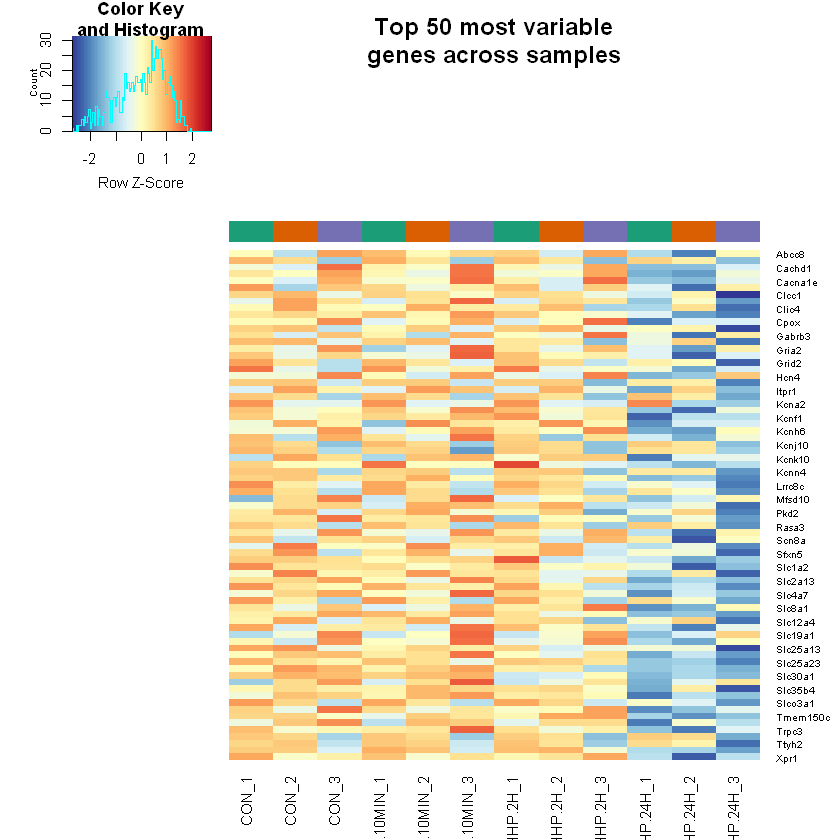

In [ ]:
## Get some nicer colours
mypalette <- brewer.pal(11, "RdYlBu")
morecols <- colorRampPalette(mypalette)
# Set up colour vector for celltype variable
col.status <- c("#1B9E77", "#D95F02", "#7570B3")[sampleinfo$Batch]
# Plot the heatmap
heatmap.2(highly_variable_lcpm, col = rev(morecols(100)), ColSideColors = col.status,
    scale = "row", dendrogram = "none", Rowv = FALSE, Colv = FALSE, trace = "none",
    main = "Top 50 most variable
genes across samples", )